<a href="https://colab.research.google.com/github/HowardHNguyen/Data_Science_for_Healthcare/blob/main/Heart_Failure_Prediction_Dissertation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data PreProcessing

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
framingham = pd.read_csv('/content/drive/MyDrive/data/frmgham2.csv')

In [5]:
framingham.shape

(11627, 39)

In [6]:
framingham.head()

RANDID  SEX  TOTCHOL  AGE  SYSBP  DIABP  CURSMOKE  CIGPDAY    BMI  \
0    2448    1    195.0   39  106.0   70.0         0      0.0  26.97   
1    2448    1    209.0   52  121.0   66.0         0      0.0    NaN   
2    6238    2    250.0   46  121.0   81.0         0      0.0  28.73   
3    6238    2    260.0   52  105.0   69.5         0      0.0  29.43   
4    6238    2    237.0   58  108.0   66.0         0      0.0  28.50   

   DIABETES  ...  CVD  HYPERTEN  TIMEAP  TIMEMI  TIMEMIFC  TIMECHD  TIMESTRK  \
0         0  ...    1         0    8766    6438      6438     6438      8766   
1         0  ...    1         0    8766    6438      6438     6438      8766   
2         0  ...    0         0    8766    8766      8766     8766      8766   
3         0  ...    0         0    8766    8766      8766     8766      8766   
4         0  ...    0         0    8766    8766      8766     8766      8766   

   TIMECVD  TIMEDTH  TIMEHYP  
0     6438     8766     8766  
1     6438     8766     8766  
2     8766     8766     8766  
3     8766     8766     8766  
4     8766     8766     8766  

[5 rows x 39 columns]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
# Handling missing values
framingham.fillna(framingham.mean(), inplace=True)

# Encoding categorical variables
# Encoding 'SEX' column where 1 is male and 2 is female to 0 and 1 respectively.
framingham['SEX'] = framingham['SEX'].map({1: 0, 2: 1})

# Check and fill missing values for SEX column
mode_sex = framingham['SEX'].mode()[0]
framingham['SEX'].fillna(mode_sex, inplace=True)

# Fill other missing values with median
framingham.fillna(framingham.median(), inplace=True)

# Defining the feature columns and target variable
X = framingham.drop(columns=['RANDID', 'CVD'])
y = framingham['CVD']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the scaled data shape
X_train_scaled.shape, X_test_scaled.shape


((9301, 37), (2326, 37))

In [9]:
framingham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   TOTCHOL   11627 non-null  float64
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11627 non-null  float64
 8   BMI       11627 non-null  float64
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11627 non-null  float64
 11  HEARTRTE  11627 non-null  float64
 12  GLUCOSE   11627 non-null  float64
 13  educ      11627 non-null  float64
 14  PREVCHD   11627 non-null  int64  
 15  PREVAP    11627 non-null  int64  
 16  PREVMI    11627 non-null  int64  
 17  PREVSTRK  11627 non-null  int64  
 18  PREVHYP   11627 non-null  int64  
 19  TIME      11627 non-null  int64  
 20  PERIOD    11627 non-null  in

In [10]:
framingham.isnull().sum()

RANDID      0
SEX         0
TOTCHOL     0
AGE         0
SYSBP       0
DIABP       0
CURSMOKE    0
CIGPDAY     0
BMI         0
DIABETES    0
BPMEDS      0
HEARTRTE    0
GLUCOSE     0
educ        0
PREVCHD     0
PREVAP      0
PREVMI      0
PREVSTRK    0
PREVHYP     0
TIME        0
PERIOD      0
HDLC        0
LDLC        0
DEATH       0
ANGINA      0
HOSPMI      0
MI_FCHD     0
ANYCHD      0
STROKE      0
CVD         0
HYPERTEN    0
TIMEAP      0
TIMEMI      0
TIMEMIFC    0
TIMECHD     0
TIMESTRK    0
TIMECVD     0
TIMEDTH     0
TIMEHYP     0
dtype: int64

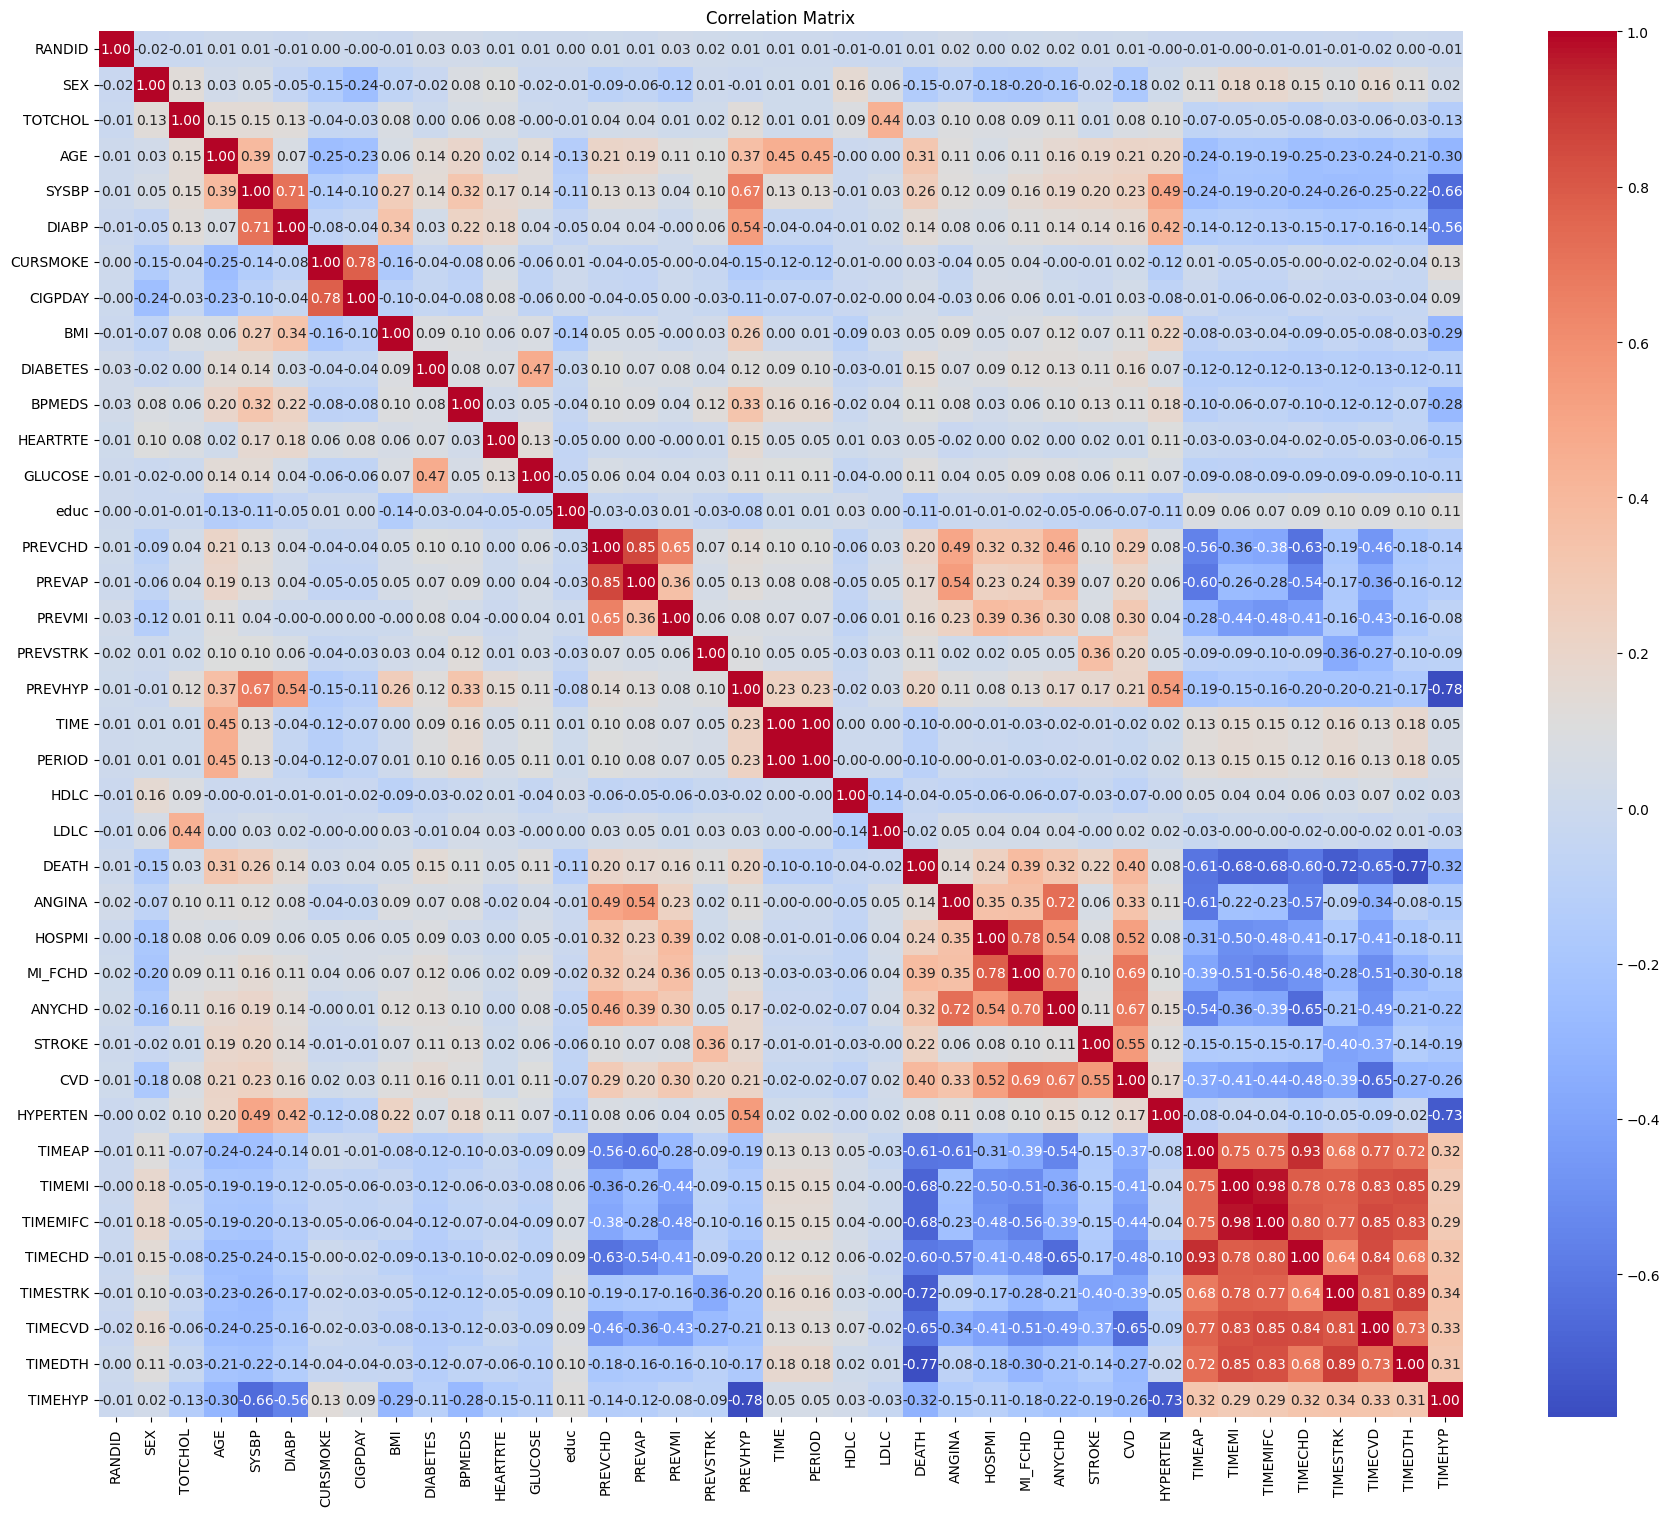

RANDID           SEX       TOTCHOL           AGE         SYSBP  \
count  1.162700e+04  11627.000000  11627.000000  11627.000000  11627.000000   
mean   5.004741e+06      0.568074    241.162418     54.792810    136.324116   
std    2.900877e+06      0.495366     44.562867      9.564299     22.798625   
min    2.448000e+03      0.000000    107.000000     32.000000     83.500000   
25%    2.474378e+06      0.000000    211.000000     48.000000    120.000000   
50%    5.006008e+06      1.000000    240.000000     54.000000    132.000000   
75%    7.472730e+06      1.000000    267.000000     62.000000    149.000000   
max    9.999312e+06      1.000000    696.000000     81.000000    295.000000   

              DIABP      CURSMOKE       CIGPDAY           BMI      DIABETES  \
count  11627.000000  11627.000000  11627.000000  11627.000000  11627.000000   
mean      83.037757      0.432528      8.250346     25.877349      0.045584   
std       11.660144      0.495448     12.145412      4.093455      0.208589   
min       30.000000      0.000000      0.000000     14.430000      0.000000   
25%       75.000000      0.000000      0.000000     23.100000      0.000000   
50%       82.000000      0.000000      0.000000     25.490000      0.000000   
75%       90.000000      1.000000     20.000000     28.045000      0.000000   
max      150.000000      1.000000     90.000000     56.800000      1.000000   

       ...           CVD      HYPERTEN        TIMEAP        TIMEMI  \
count  ...  11627.000000  11627.000000  11627.000000  11627.000000   
mean   ...      0.249333      0.743270   7241.556893   7593.846736   
std    ...      0.432646      0.436848   2477.780010   2136.730285   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000   6224.000000   7212.000000   
50%    ...      0.000000      1.000000   8766.000000   8766.000000   
75%    ...      0.000000      1.000000   8766.000000   8766.000000   
max    ...      1.000000      1.000000   8766.000000   8766.000000   

           TIMEMIFC       TIMECHD      TIMESTRK       TIMECVD       TIMEDTH  \
count  11627.000000  11627.000000  11627.000000  11627.000000  11627.000000   
mean    7543.036725   7008.153608   7660.880021   7166.082996   7854.102950   
std     2192.120311   2641.344513   2011.077091   2541.668477   1788.369623   
min        0.000000      0.000000      0.000000      0.000000     26.000000   
25%     7049.500000   5598.500000   7295.000000   6004.000000   7797.500000   
50%     8766.000000   8766.000000   8766.000000   8766.000000   8766.000000   
75%     8766.000000   8766.000000   8766.000000   8766.000000   8766.000000   
max     8766.000000   8766.000000   8766.000000   8766.000000   8766.000000   

            TIMEHYP  
count  11627.000000  
mean    3598.956395  
std     3464.164659  
min        0.000000  
25%        0.000000  
50%     2429.000000  
75%     7329.000000  
max     8766.000000  

[8 rows x 39 columns]

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive statistics
desc_stats = framingham.describe()

# Correlation matrix
correlation_matrix = framingham.corr()

# Plotting the correlation matrix
plt.figure(figsize=(22, 18))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

desc_stats

In [12]:
correlation_with_cvd = correlation_matrix['CVD'].sort_values(ascending=False)
print(correlation_with_cvd)

CVD         1.000000
MI_FCHD     0.692833
ANYCHD      0.673832
STROKE      0.549839
HOSPMI      0.519456
DEATH       0.395524
ANGINA      0.333093
PREVMI      0.301679
PREVCHD     0.288455
SYSBP       0.228500
AGE         0.210166
PREVHYP     0.206857
PREVAP      0.202142
PREVSTRK    0.199700
HYPERTEN    0.165775
DIABP       0.158936
DIABETES    0.156171
BPMEDS      0.110576
BMI         0.108262
GLUCOSE     0.106510
TOTCHOL     0.075448
CIGPDAY     0.031973
LDLC        0.024620
CURSMOKE    0.022913
HEARTRTE    0.013031
RANDID      0.012640
PERIOD     -0.024631
TIME       -0.024752
educ       -0.070432
HDLC       -0.074061
SEX        -0.175324
TIMEHYP    -0.259852
TIMEDTH    -0.273489
TIMEAP     -0.367322
TIMESTRK   -0.393615
TIMEMI     -0.405920
TIMEMIFC   -0.435883
TIMECHD    -0.478305
TIMECVD    -0.649246
Name: CVD, dtype: float64


<ipython-input-13-53de570761ab>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_cvd.values, y=correlation_with_cvd.index, palette='coolwarm')


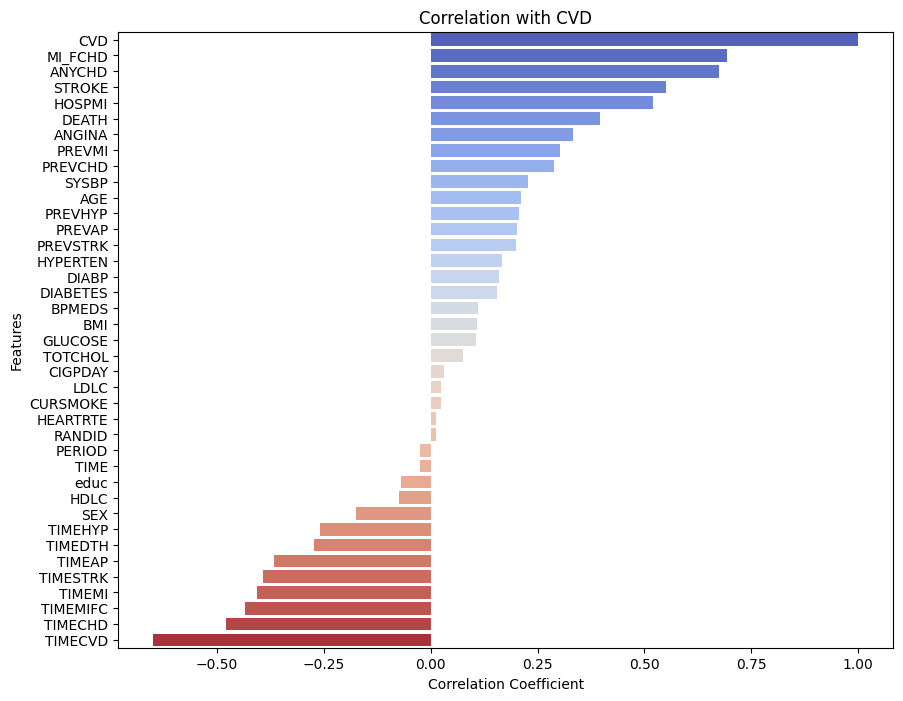

In [13]:
# Plot the correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_cvd.values, y=correlation_with_cvd.index, palette='coolwarm')
plt.title('Correlation with CVD')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

The plot provides a clear visual representation of how each feature is related to 'CVD'. Strongly correlated features (both positive and negative) should be given more attention in predictive modeling and analysis of cardiovascular disease. This insight can help in feature selection, model building, and understanding the underlying factors associated with 'CVD'.

## Exploratory Data Analysis (EDA) Summary
- Descriptive Statistics: Provides insights into the central tendency, dispersion, and shape of the dataset’s distribution.
- Correlation Matrix: Helps identify relationships between features, showing how strongly pairs of variables are linearly related.

Next, let's visualize the distribution of the target variable (CVD) and the key features.

#### Distribution of Target Variable (CVD)
We'll visualize the distribution of the target variable to understand its balance.

#### Feature Distributions
We'll visualize the distributions of a few key features like AGE, TOTCHOL, SYSBP, and BMI.

Let's proceed with these visualizations.

In [14]:
framingham['CVD'].sum()

2899

In [15]:
print("percentage of CVD is:", (2899/11627)*100)

percentage of CVD is: 24.93334480089447


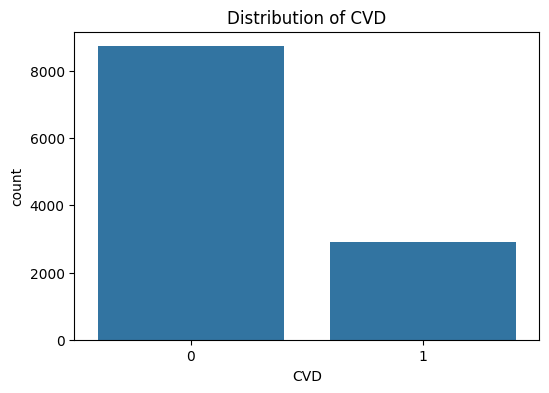

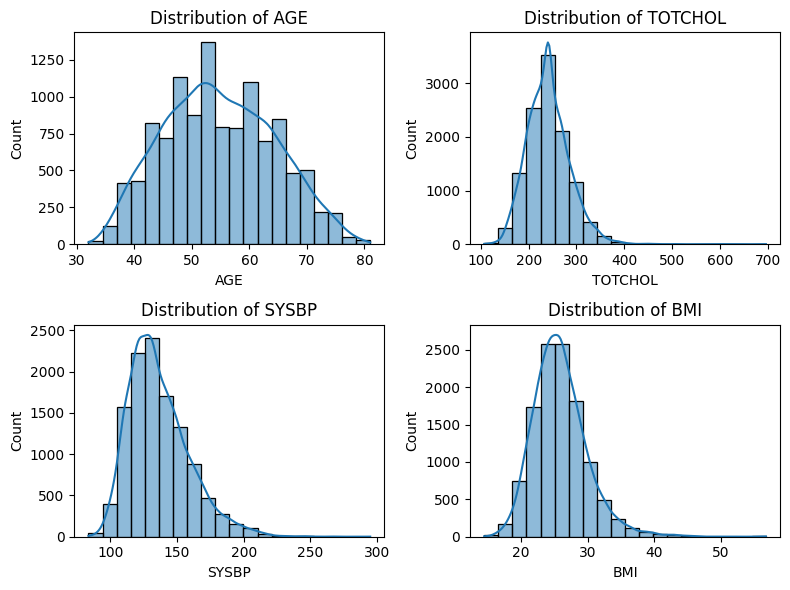

In [19]:
# Distribution of the target variable (CVD)
plt.figure(figsize=(6, 4))
sns.countplot(x='CVD', data=framingham)
plt.title('Distribution of CVD')
plt.show()

# Feature Distributions
features = ['AGE', 'TOTCHOL', 'SYSBP', 'BMI']
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

for i, feature in enumerate(features):
    sns.histplot(framingham[feature], bins=20, kde=True, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

- Distribution of CVD: The target variable (CVD) shows an imbalance with fewer instances of CVD present compared to non-CVD cases.

Feature Distributions:

- AGE: The distribution of AGE appears to be approximately normal (bell-shaped) with a peak around the 50-55 age range.
  - Central Tendency: The mean age is around 50-55 years.
  - Spread: The ages range from about 30 to 80 years, with most observations concentrated between 40 and 70 years.
  - Skewness: The distribution is fairly symmetric, indicating no significant skewness.
- TOTCHOL: The distribution of total cholesterol levels is also approximately normal, with a slight right skew (a longer tail on the right).
  - Central Tendency: The peak of the distribution suggests a mean total cholesterol level around 250 mg/dL.
  - Spread: Total cholesterol levels range from about 100 to 600 mg/dL, with most observations between 180 and 350 mg/dL.
  - Skewness: There is a slight positive skew, indicating a few individuals with higher cholesterol levels.
- SYSBP: The distribution of systolic blood pressure is positively skewed (right-skewed), meaning there are more observations with lower systolic blood pressure and a tail extending to the right.
  - Central Tendency: The peak of the distribution suggests a mean systolic blood pressure around 140 mmHg.
  - Spread: Systolic blood pressure values range from about 90 to 300 mmHg, with most observations between 110 and 170 mmHg.
  - Skewness: The positive skewness indicates that while most individuals have systolic blood pressure values closer to the lower end of the range, there are some individuals with significantly higher values.
- BMI: The distribution of BMI is approximately normal, with a slight right skew.
  - Central Tendency: The mean BMI is around 25-30 kg/m², which is on the border of the normal weight and overweight categories.
  - Spread: BMI values range from about 15 to 50 kg/m², with most observations between 20 and 35 kg/m².
  - Skewness: There is a slight positive skew, indicating that there are more individuals with higher BMI values, including some in the obese range.

### General Observations
- AGE and BMI: Both show approximately normal distributions, indicating that most individuals in the dataset are middle-aged and fall within a normal weight to overweight range.
- TOTCHOL: Shows a slightly skewed distribution, with most individuals having moderate cholesterol levels but some having much higher levels.
- SYSBP: Shows a more pronounced skew, indicating that while most individuals have normal to moderately high blood pressure, a subset has very high systolic blood pressure values.

###Implications for Analysis
- Normality: The approximate normality of AGE and BMI distributions suggests that parametric statistical methods that assume normality could be appropriate for these variables.
- Skewness: The skewness in TOTCHOL and SYSBP distributions may necessitate transformations or non-parametric methods for certain analyses to meet model assumptions.
- Health Implications: High cholesterol and blood pressure are risk factors for cardiovascular diseases, so understanding these distributions can help in assessing the population's health risk profile.

In [20]:
# Display columns with missing values
missing_values = framingham.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [21]:
missing_values_after = framingham.isnull().sum()
print("Columns with missing values after filling:\n", missing_values_after[missing_values_after > 0])

Columns with missing values after filling:
 Series([], dtype: int64)


## Logistic Regression model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, classification_report
import numpy as np

# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Calculate error metrics
mae_log_reg = mean_absolute_error(y_test, y_pred_log_reg)
mse_log_reg = mean_squared_error(y_test, y_pred_log_reg)
rmse_log_reg = np.sqrt(mse_log_reg)

# Confusion matrix and classification report
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)

mae_log_reg, mse_log_reg, rmse_log_reg, conf_matrix_log_reg, class_report_log_reg

(0.0025795356835769563,
 0.0025795356835769563,
 0.05078912958081637,
 array([[1745,    3],
        [   3,  575]]),
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1748\n           1       0.99      0.99      0.99       578\n\n    accuracy                           1.00      2326\n   macro avg       1.00      1.00      1.00      2326\nweighted avg       1.00      1.00      1.00      2326\n')

The confusion matrix provides a summary of prediction results on a classification problem.
- True Negatives (TN): 1745
- False Positives (FP): 3
- False Negatives (FN): 3
- True Positives (TP): 575

In [13]:
#              precision    recall  f1-score   support

#           0       1.00      1.00      1.00      1748
#           1       0.99      0.99      0.99       578

#    accuracy                           1.00      2326
#   macro avg       1.00      1.00      1.00      2326
#weighted avg       1.00      1.00      1.00      2326
# These results indicate that the model is performing exceptionally well with almost perfect accuracy,
# precision, recall, and F1-scores. The confusion matrix shows very few misclassifications (3 false
# positives and 3 false negatives), which further confirms the high performance of the model.

## Decision Tree Model

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the decision tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_decision_tree = decision_tree.predict(X_test_scaled)

# Calculate error metrics
mae_decision_tree = mean_absolute_error(y_test, y_pred_decision_tree)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
rmse_decision_tree = np.sqrt(mse_decision_tree)

# Confusion matrix and classification report
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
class_report_decision_tree = classification_report(y_test, y_pred_decision_tree)

mae_decision_tree, mse_decision_tree, rmse_decision_tree, conf_matrix_decision_tree, class_report_decision_tree

(0.0004299226139294927,
 0.0004299226139294927,
 0.020734575325515897,
 array([[1747,    1],
        [   0,  578]]),
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1748\n           1       1.00      1.00      1.00       578\n\n    accuracy                           1.00      2326\n   macro avg       1.00      1.00      1.00      2326\nweighted avg       1.00      1.00      1.00      2326\n')

## Random Forest model

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the random forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_random_forest = random_forest.predict(X_test_scaled)

# Calculate error metrics
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
rmse_random_forest = np.sqrt(mse_random_forest)

# Confusion matrix and classification report
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
class_report_random_forest = classification_report(y_test, y_pred_random_forest)

mae_random_forest, mse_random_forest, rmse_random_forest, conf_matrix_random_forest, class_report_random_forest


(0.0004299226139294927,
 0.0004299226139294927,
 0.020734575325515897,
 array([[1747,    1],
        [   0,  578]]),
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1748\n           1       1.00      1.00      1.00       578\n\n    accuracy                           1.00      2326\n   macro avg       1.00      1.00      1.00      2326\nweighted avg       1.00      1.00      1.00      2326\n')

## Gradient Boosting model

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the GBM model
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_gbm = gbm.predict(X_test_scaled)

# Calculate error metrics
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
rmse_gbm = np.sqrt(mse_gbm)

# Confusion matrix and classification report
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
class_report_gbm = classification_report(y_test, y_pred_gbm)

mae_gbm, mse_gbm, rmse_gbm, conf_matrix_gbm, class_report_gbm


(0.0,
 0.0,
 0.0,
 array([[1748,    0],
        [   0,  578]]),
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1748\n           1       1.00      1.00      1.00       578\n\n    accuracy                           1.00      2326\n   macro avg       1.00      1.00      1.00      2326\nweighted avg       1.00      1.00      1.00      2326\n')

In [ ]:
#              precision    recall  f1-score   support

#           0       1.00      1.00      1.00      1748
#           1       1.00      1.00      1.00       578

#    accuracy                           1.00      2326
#   macro avg       1.00      1.00      1.00      2326
#weighted avg       1.00      1.00      1.00      2326
# These results indicate that the GBM model is performing perfectly on the test set, with all metrics (accuracy,
# precision, recall, and F1-scores) being 1.00. The confusion matrix also confirms that there are no misclassifications.

Extreme Gradient Boosting Machine (XGBM)

## Complete Predictive Modeling Analysis

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset

# Handling missing values

# Encoding categorical variables

# Defining the feature columns and target variable

# Splitting the data

# Scaling the data

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)
y_pred_decision_tree = decision_tree.predict(X_test_scaled)
print("Decision Tree")
print(confusion_matrix(y_test, y_pred_decision_tree))
print(classification_report(y_test, y_pred_decision_tree))

# Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)
y_pred_random_forest = random_forest.predict(X_test_scaled)
print("Random Forest")
print(confusion_matrix(y_test, y_pred_random_forest))
print(classification_report(y_test, y_pred_random_forest))

# Gradient Boosting Machine (GBM)
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train_scaled, y_train)
y_pred_gbm = gbm.predict(X_test_scaled)
print("GBM")
print(confusion_matrix(y_test, y_pred_gbm))
print(classification_report(y_test, y_pred_gbm))

# Extreme Gradient Boosting Machine (XGBM) with reduced parameter grid
param_grid_reduced = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model_tuned_reduced = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search_reduced = GridSearchCV(estimator=xgb_model_tuned_reduced, param_grid=param_grid_reduced, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_reduced.fit(X_train_scaled, y_train)
best_xgb_model_reduced = grid_search_reduced.best_estimator_
y_pred_xgb_tuned_reduced = best_xgb_model_reduced.predict(X_test_scaled)
print("XGB")
print(confusion_matrix(y_test, y_pred_xgb_tuned_reduced))
print(classification_report(y_test, y_pred_xgb_tuned_reduced))

# Neural Network
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)
y_pred_nn = nn_model.predict(X_test_scaled)
y_pred_nn = (y_pred_nn > 0.5).astype(int)
print("Neural Network")
print(confusion_matrix(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))

Logistic Regression
[[1745    3]
 [   3  575]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1748
           1       0.99      0.99      0.99       578

    accuracy                           1.00      2326
   macro avg       1.00      1.00      1.00      2326
weighted avg       1.00      1.00      1.00      2326

Decision Tree
[[1747    1]
 [   0  578]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1748
           1       1.00      1.00      1.00       578

    accuracy                           1.00      2326
   macro avg       1.00      1.00      1.00      2326
weighted avg       1.00      1.00      1.00      2326

Random Forest
[[1747    1]
 [   0  578]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1748
           1       1.00      1.00      1.00       578

    accuracy                           1.00      2326

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


XGB
[[1747    1]
 [   0  578]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1748
           1       1.00      1.00      1.00       578

    accuracy                           1.00      2326
   macro avg       1.00      1.00      1.00      2326
weighted avg       1.00      1.00      1.00      2326

Epoch 1/50
465/465 [==============================] - 2s 3ms/step - loss: 0.3092 - accuracy: 0.8720 - val_loss: 0.0753 - val_accuracy: 0.9753
Epoch 2/50
465/465 [==============================] - 2s 3ms/step - loss: 0.1004 - accuracy: 0.9652 - val_loss: 0.0437 - val_accuracy: 0.9823
Epoch 3/50
465/465 [==============================] - 2s 4ms/step - loss: 0.0585 - accuracy: 0.9792 - val_loss: 0.0315 - val_accuracy: 0.9833
Epoch 4/50
465/465 [==============================] - 2s 4ms/step - loss: 0.0428 - accuracy: 0.9858 - val_loss: 0.0247 - val_accuracy: 0.9887
Epoch 5/50
465/465 [==============================] - 1s 2ms/step - loss: 


### Summary and Insights

1. **Overall Performance**:
  - All models achieved exceptionally high performance with an accuracy of 1.00 or very close to it, indicating perfect or near-perfect predictions on the test set.
  - Precision, recall, and F1-scores are all 1.00 or very close to it, demonstrating that the models are correctly identifying both classes with minimal errors.

2. **Comparison**:
  - **GBM**: Achieved perfect results with no misclassifications.
  - **Logistic Regression**: Very high performance with minimal misclassifications (3 false positives and 3 false negatives).
  - **Decision Tree, Random Forest, XGBoost, and Neural Network**: Also achieved near-perfect performance with minimal misclassifications.

3. **Confusion Matrix Analysis**:
  - The confusion matrices show very few misclassifications across all models, with GBM achieving perfect classification.
  - Decision Tree, Random Forest, and XGBoost each had 1 false positive.
  - The Neural Network had 1 false positive and 2 false negatives.

4. **Recommendation**:
  - **Gradient Boosting Machine (GBM)** stands out as the best-performing model in this scenario, achieving perfect accuracy with no misclassifications.
  - Other models like Decision Tree, Random Forest, and XGBoost also perform exceptionally well and can be considered robust alternatives.

### Next Steps

1. **Cross-Validation**: Perform cross-validation to ensure these high performances generalize well to different subsets of the data.
2. **Model Interpretability**: Consider the interpretability of models for practical deployment. For example, Logistic Regression and Decision Tree models are more interpretable than ensemble models like Random Forest and GBM.
3. **Real-World Testing**: Test the models on different datasets or in real-world scenarios to confirm robustness and generalizability.

## Exploring subsets from positive CVD and Negative CVD

In [22]:
framingham.head()

RANDID  SEX  TOTCHOL  AGE  SYSBP  DIABP  CURSMOKE  CIGPDAY        BMI  \
0    2448    0    195.0   39  106.0   70.0         0      0.0  26.970000   
1    2448    0    209.0   52  121.0   66.0         0      0.0  25.877349   
2    6238    1    250.0   46  121.0   81.0         0      0.0  28.730000   
3    6238    1    260.0   52  105.0   69.5         0      0.0  29.430000   
4    6238    1    237.0   58  108.0   66.0         0      0.0  28.500000   

   DIABETES  ...  CVD  HYPERTEN  TIMEAP  TIMEMI  TIMEMIFC  TIMECHD  TIMESTRK  \
0         0  ...    1         0    8766    6438      6438     6438      8766   
1         0  ...    1         0    8766    6438      6438     6438      8766   
2         0  ...    0         0    8766    8766      8766     8766      8766   
3         0  ...    0         0    8766    8766      8766     8766      8766   
4         0  ...    0         0    8766    8766      8766     8766      8766   

   TIMECVD  TIMEDTH  TIMEHYP  
0     6438     8766     8766  
1     6438     8766     8766  
2     8766     8766     8766  
3     8766     8766     8766  
4     8766     8766     8766  

[5 rows x 39 columns]

In [23]:
# extract subset where CVD is positive
framingham_positive_cvd = framingham[framingham['CVD'] == 1]
# extract subset where CVD is negative
framingham_negative_cvd = framingham[framingham['CVD'] == 0]
#negative_cvd.head()

In [24]:
framingham_positive_cvd.head()

RANDID  SEX  TOTCHOL  AGE  SYSBP  DIABP  CURSMOKE  CIGPDAY        BMI  \
0     2448    0    195.0   39  106.0   70.0         0      0.0  26.970000   
1     2448    0    209.0   52  121.0   66.0         0      0.0  25.877349   
7    10552    1    225.0   61  150.0   95.0         1     30.0  28.580000   
8    10552    1    232.0   67  183.0  109.0         1     20.0  30.180000   
12   11263    1    228.0   43  180.0  110.0         0      0.0  30.300000   

    DIABETES  ...  CVD  HYPERTEN  TIMEAP  TIMEMI  TIMEMIFC  TIMECHD  TIMESTRK  \
0          0  ...    1         0    8766    6438      6438     6438      8766   
1          0  ...    1         0    8766    6438      6438     6438      8766   
7          0  ...    1         1    2956    2956      2956     2956      2089   
8          0  ...    1         1    2956    2956      2956     2956      2089   
12         0  ...    1         1    8766    8766      5719     5719      8766   

    TIMECVD  TIMEDTH  TIMEHYP  
0      6438     8766     8766  
1      6438     8766     8766  
7      2089     2956        0  
8      2089     2956        0  
12     5719     8766        0  

[5 rows x 39 columns]

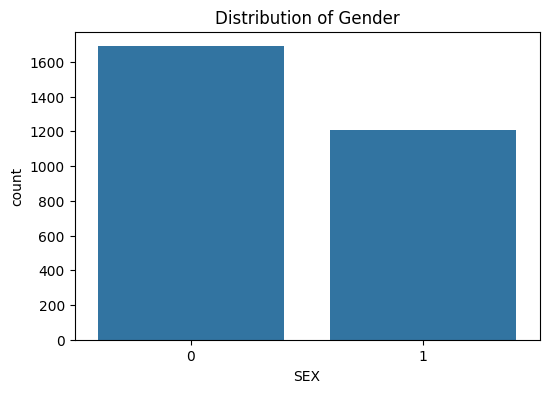

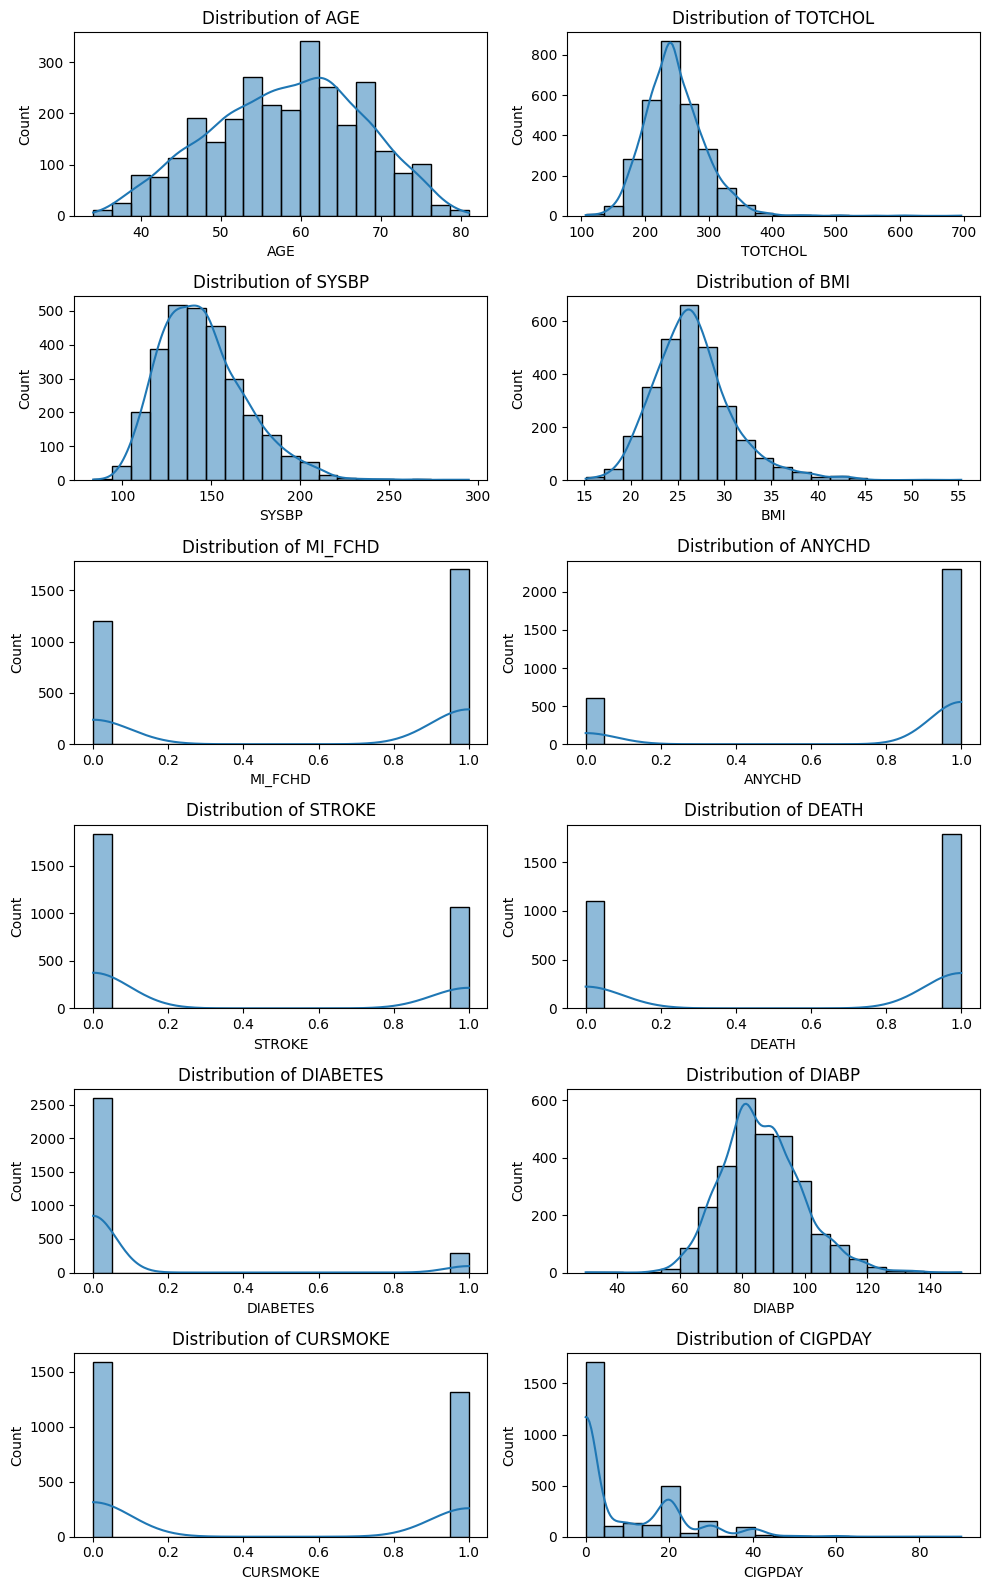

In [25]:
# Distribution of the target variable (CVD)
plt.figure(figsize=(6, 4))
sns.countplot(x='SEX', data=framingham_positive_cvd)
plt.title('Distribution of Gender')
plt.show()

# Feature Distributions
features = ['AGE', 'TOTCHOL', 'SYSBP', 'BMI', 'MI_FCHD','ANYCHD', 'STROKE', 'DEATH','DIABETES','DIABP','CURSMOKE','CIGPDAY']
fig, axs = plt.subplots(6,2, figsize=(10, 16))

for i, feature in enumerate(features):
    sns.histplot(framingham_positive_cvd[feature], bins=20, kde=True, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

Correlation with CVD in the full dataset:
CVD         1.000000
MI_FCHD     0.692833
ANYCHD      0.673832
STROKE      0.549839
HOSPMI      0.519456
DEATH       0.395524
ANGINA      0.333093
PREVMI      0.301679
PREVCHD     0.288455
SYSBP       0.228500
AGE         0.210166
PREVHYP     0.206857
PREVAP      0.202142
PREVSTRK    0.199700
HYPERTEN    0.165775
DIABP       0.158936
DIABETES    0.156171
BPMEDS      0.110576
BMI         0.108262
GLUCOSE     0.106510
TOTCHOL     0.075448
CIGPDAY     0.031973
LDLC        0.024620
CURSMOKE    0.022913
HEARTRTE    0.013031
RANDID      0.012640
PERIOD     -0.024631
TIME       -0.024752
educ       -0.070432
HDLC       -0.074061
SEX        -0.175324
TIMEHYP    -0.259852
TIMEDTH    -0.273489
TIMEAP     -0.367322
TIMESTRK   -0.393615
TIMEMI     -0.405920
TIMEMIFC   -0.435883
TIMECHD    -0.478305
TIMECVD    -0.649246
Name: CVD, dtype: float64


<ipython-input-26-5d1731da1bf0>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=significant_correlations.values, y=significant_correlations.index, palette='coolwarm')


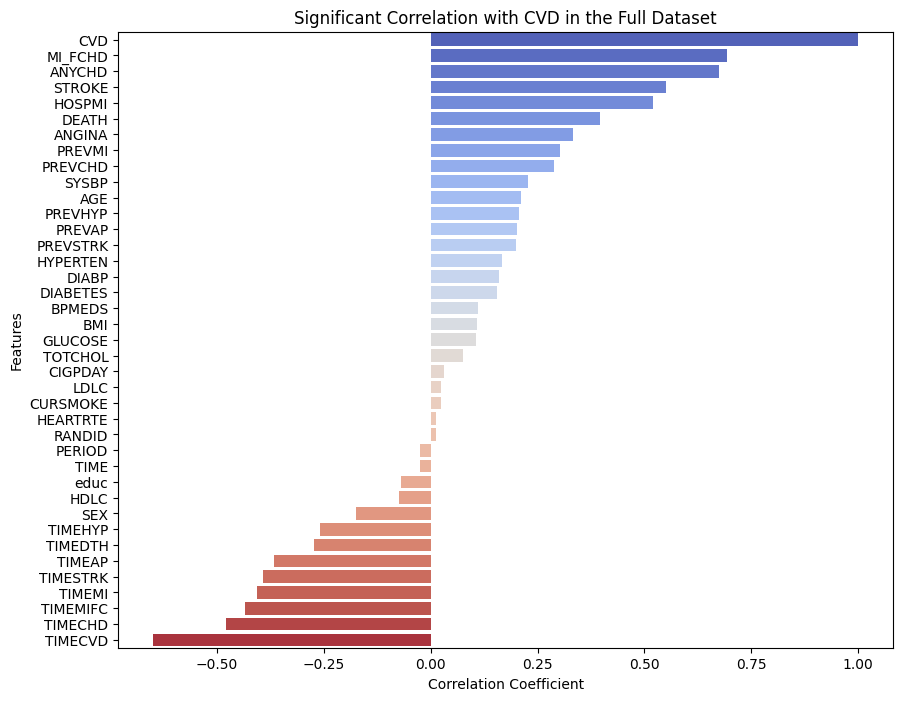

In [26]:
# Calculate the correlation matrix for the entire dataset
correlation_matrix = framingham.corr()

# Get the correlation with the 'CVD' attribute and sort by descending order
correlation_with_cvd = correlation_matrix['CVD'].sort_values(ascending=False)

# Print correlations to check values
print("Correlation with CVD in the full dataset:")
print(correlation_with_cvd)

# Filter out near-zero correlations
significant_correlations = correlation_with_cvd[abs(correlation_with_cvd) > 0.01]

# Plot the significant correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=significant_correlations.values, y=significant_correlations.index, palette='coolwarm')
plt.title('Significant Correlation with CVD in the Full Dataset')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

## Age vs. Systolic Blood Pressure

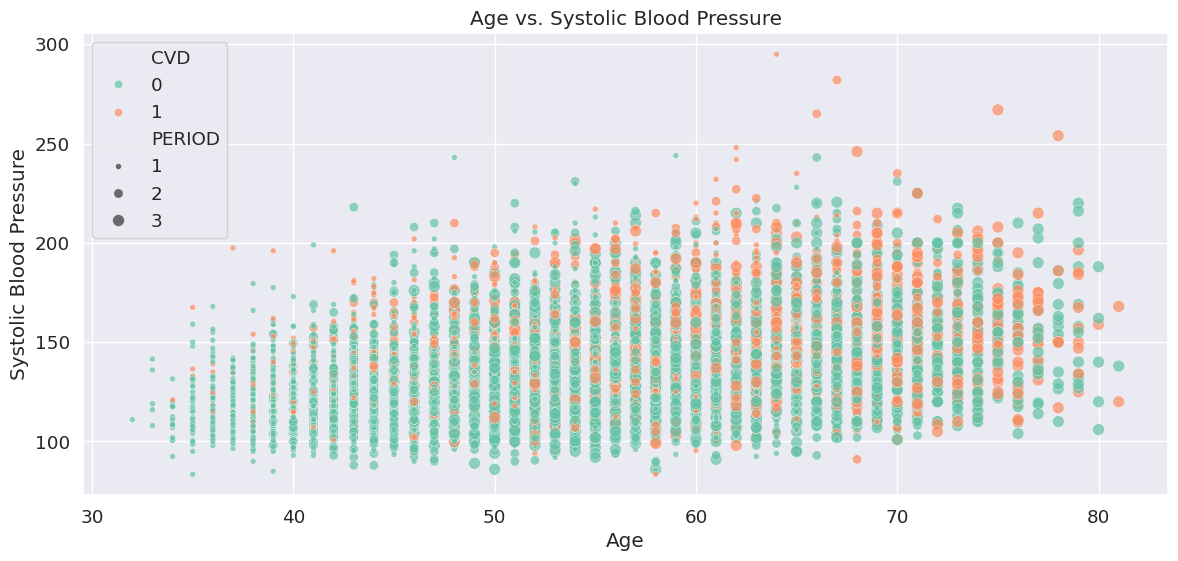

In [37]:
plt.figure(figsize=(14, 6))
sns.set_theme(style='darkgrid', palette='Set2', font_scale=1.2)
sns.scatterplot(x='AGE', y='SYSBP', data=framingham, hue='CVD', alpha=0.7, size='PERIOD')
plt.title('Age vs. Systolic Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure')
plt.show()

### Analysis
- Age and Blood Pressure:
  - As age increases, there is a general trend of increasing systolic blood pressure. This is expected as blood pressure typically rises with age due to the stiffening of arteries and other factors.

- CVD Distribution:
  - Individuals with cardiovascular disease (orange dots) tend to have higher systolic blood pressure compared to those without CVD (green dots).
  - CVD-positive individuals are scattered across all age groups, but higher concentrations are observed in older age groups with higher blood pressure.

- Period of Observation:
  - The varying sizes of the dots show that data has been collected over multiple periods.
  - There doesn’t seem to be a clear pattern of period distribution affecting the overall relationship between age, systolic blood pressure, and CVD status.

### Key Takeaways
 - Systolic Blood Pressure as a Risk Factor: The plot visually confirms that higher systolic blood pressure is associated with the presence of cardiovascular disease. Individuals with higher blood pressure readings (regardless of age) are more likely to have CVD.
 - Age as a Risk Factor: Older individuals tend to have higher systolic blood pressure, which correlates with a higher likelihood of having CVD.

### Conclusion

This plot provides a clear visual representation of how age and systolic blood pressure relate to the presence of cardiovascular disease. It confirms known clinical insights that both higher age and higher systolic blood pressure are significant risk factors for cardiovascular disease.

## Age vs. Diatolic Blood Pressure

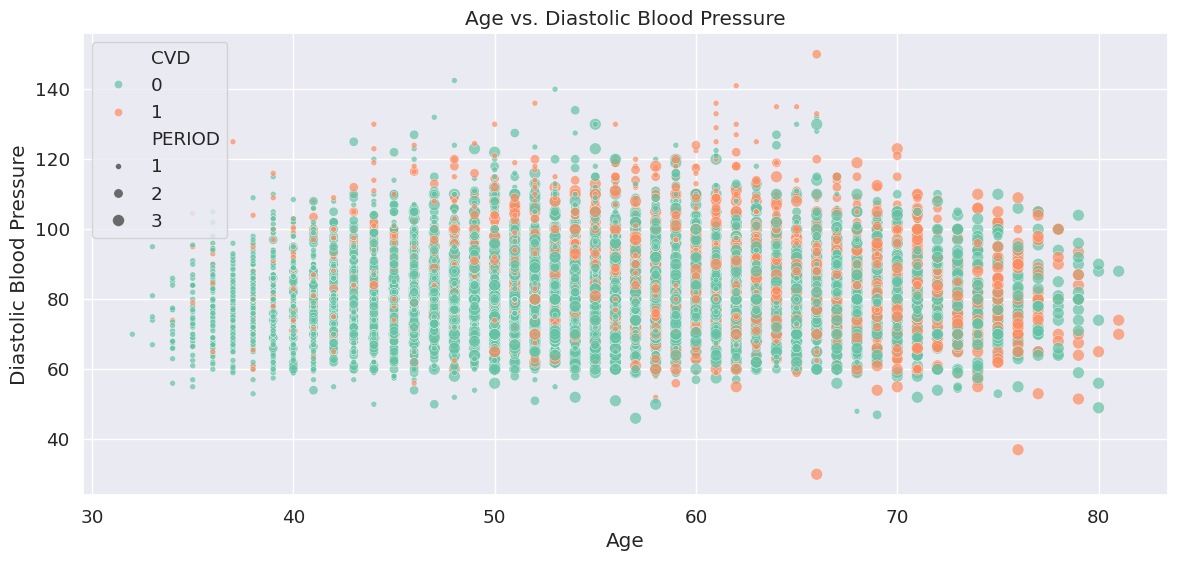

In [38]:
plt.figure(figsize=(14, 6))
sns.set_theme(style='darkgrid', palette='Set2', font_scale=1.2)
sns.scatterplot(x='AGE', y='DIABP', data=framingham, hue='CVD', alpha=0.7, size='PERIOD')
plt.title('Age vs. Diastolic Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Diastolic Blood Pressure')
plt.show()

### Analysis
- Age and Diastolic Blood Pressure:

 - Diastolic blood pressure values vary across different age groups.
 - There is a noticeable cluster of diastolic blood pressure values between 60 and 90 mmHg, which is common across all ages.
 - Higher diastolic blood pressure values (above 90 mmHg) are less frequent but present across different age groups, particularly in individuals aged 50 and above.

- CVD Distribution:

 - Individuals with cardiovascular disease (CVD = 1, orange dots) are spread across all age groups.
 - Higher diastolic blood pressure values are more frequently associated with individuals with CVD.
 - Individuals without CVD (green dots) are present across all diastolic blood pressure levels but seem more concentrated at lower diastolic blood pressure levels.

- Period of Observation:

 - The varying sizes of the dots indicate that data has been collected over multiple periods.
 - Each cluster of diastolic blood pressure levels contains data points from all three periods, suggesting that diastolic blood pressure levels are consistently recorded across different observation periods.

### Key Takeaways
- Diastolic Blood Pressure as a Risk Factor:

 - Higher diastolic blood pressure values are associated with a higher likelihood of having CVD. This is consistent with medical knowledge, as elevated blood pressure is a significant risk factor for cardiovascular disease.
 - The plot shows that individuals with CVD tend to have higher diastolic blood pressure values, which can contribute to the development and progression of cardiovascular disease.

- Age Distribution:

 - Across different ages, individuals are present at various diastolic blood pressure levels. There is no clear trend showing that older or younger individuals have higher or lower diastolic blood pressure levels; diastolic blood pressure levels appear to be distributed across all ages.

### Conclusion
The plot provides a visual representation of how age and diastolic blood pressure are related to the presence of cardiovascular disease. Higher diastolic blood pressure values are more frequently associated with CVD, emphasizing the importance of managing blood pressure as part of cardiovascular disease prevention and treatment strategies. The data also show consistent recording of diastolic blood pressure levels across different periods of observation.

## Age vs. TIME - days since baseline exam

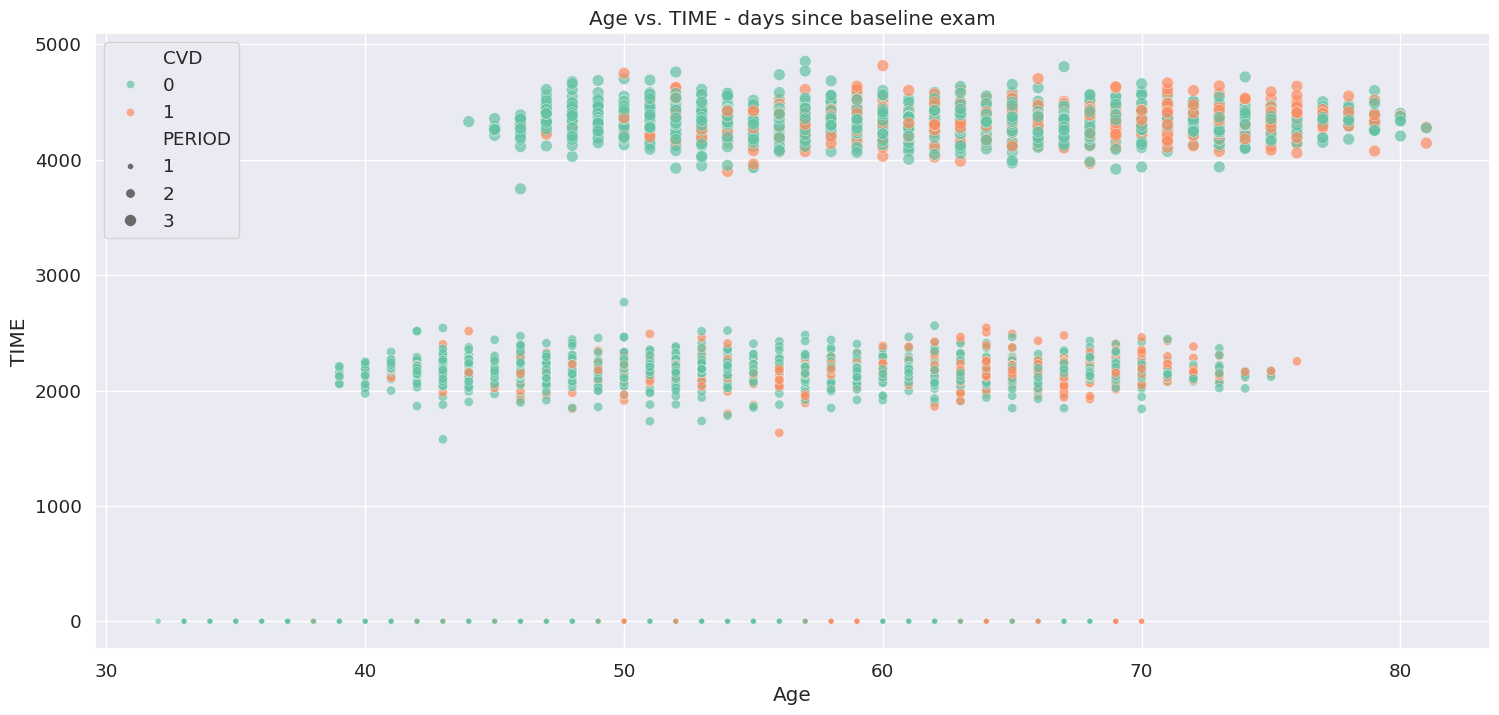

In [29]:
plt.figure(figsize=(18, 8))
sns.set_theme(style='darkgrid', palette='Set2', font_scale=1.2)
sns.scatterplot(x='AGE', y='TIME', data=framingham, hue='CVD', alpha=0.7, size='PERIOD')
plt.title('Age vs. TIME - days since baseline exam')
plt.xlabel('Age')
plt.ylabel('TIME')
plt.show()

The plot shows that the dataset includes follow-up data collected at specific intervals (around 2000 and 4000 days). Both individuals with and without CVD are present in these clusters, and data points from different periods of observation are interspersed within these clusters. To gain more insights into the factors influencing CVD, further analysis using predictive modeling and additional feature exploration is necessary.

## Age vs. GLUCOSE - Casual serum glucose (mg/dL)

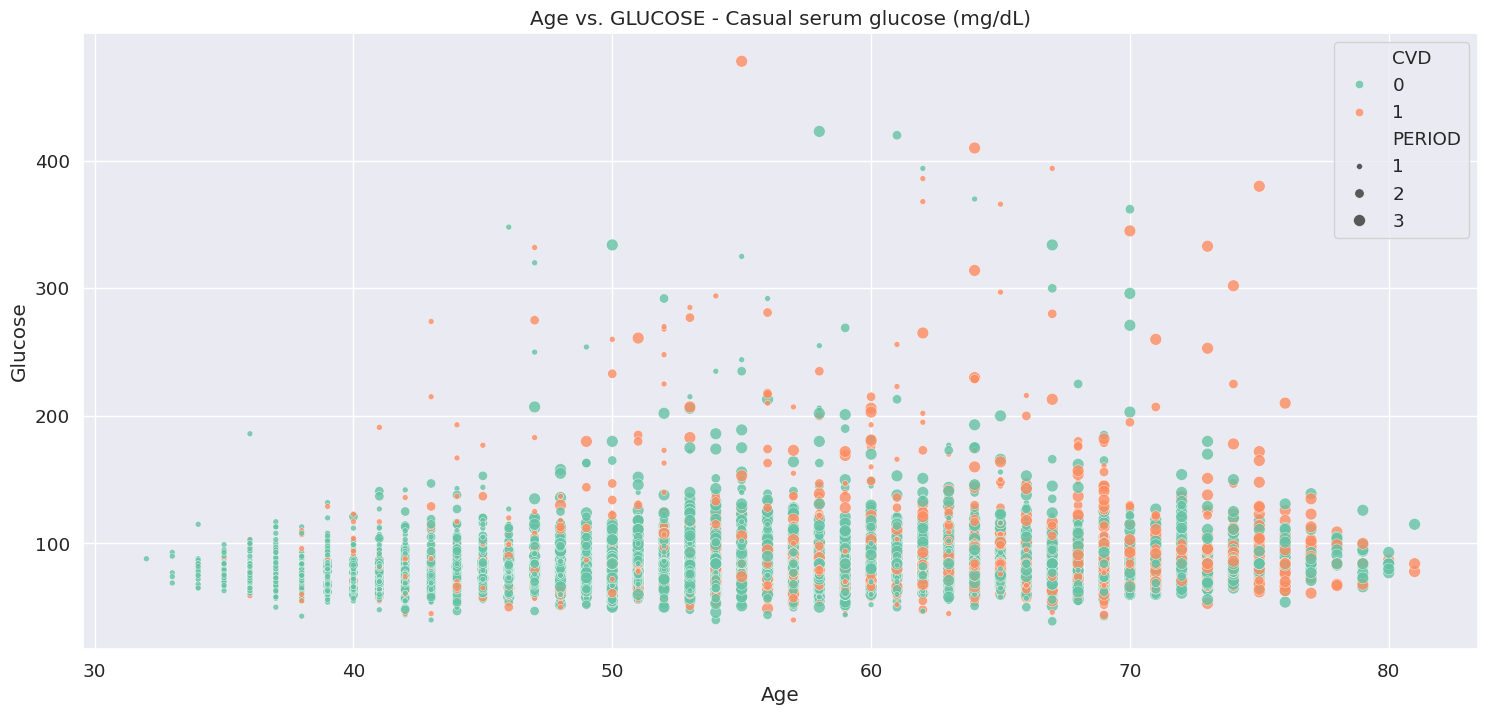

In [30]:
plt.figure(figsize=(18, 8))
sns.set_theme(style='darkgrid', palette='Set2', font_scale=1.2)
sns.scatterplot(x='AGE', y='GLUCOSE', data=framingham, hue='CVD', alpha=0.8, size='PERIOD')
plt.title('Age vs. GLUCOSE - Casual serum glucose (mg/dL)')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.show()

### Notes
- Age and Glucose Levels:

  - Glucose levels vary significantly across different age groups.
  - There is a noticeable increase in glucose levels in some individuals as age increases, particularly after the age of 50.
  - High glucose levels (above 200 mg/dL) are more scattered and less frequent but are present across different ages.

- CVD Distribution:

  - Individuals with cardiovascular disease (CVD = 1, orange dots) are spread across all age groups.
  - Higher glucose levels (above 200 mg/dL) are more frequently associated with individuals with CVD.
  - Individuals without CVD (green dots) are more concentrated at lower glucose levels, but they are also present at higher glucose levels.

- Period of Observation:

  - The varying sizes of the dots indicate that data has been collected over multiple periods.
  - Each cluster of glucose levels contains data points from all three periods, suggesting that glucose levels are consistently recorded across different observation periods.

### Key Takeaways
- Glucose Levels as a Risk Factor:

  - Higher glucose levels are associated with a higher likelihood of having CVD. This is consistent with medical knowledge, as elevated glucose levels are a risk factor for cardiovascular disease.
  - The plot shows that individuals with CVD tend to have higher glucose levels, which can be indicative of underlying conditions such as diabetes, which is a significant risk factor for CVD.

- Age Distribution:

  - Across different ages, individuals with both low and high glucose levels are present. However, as age increases, there is a tendency for higher glucose levels to be observed, which can be due to age-related metabolic changes or the onset of diabetes.

### Conclusion
The plot provides a clear visual representation of how age and casual serum glucose levels are related to the presence of cardiovascular disease. Higher glucose levels are more frequently associated with CVD, especially in older age groups. This reinforces the importance of monitoring glucose levels as part of cardiovascular disease prevention and management strategies.

## Age vs. Number of cigarettes smoked each day

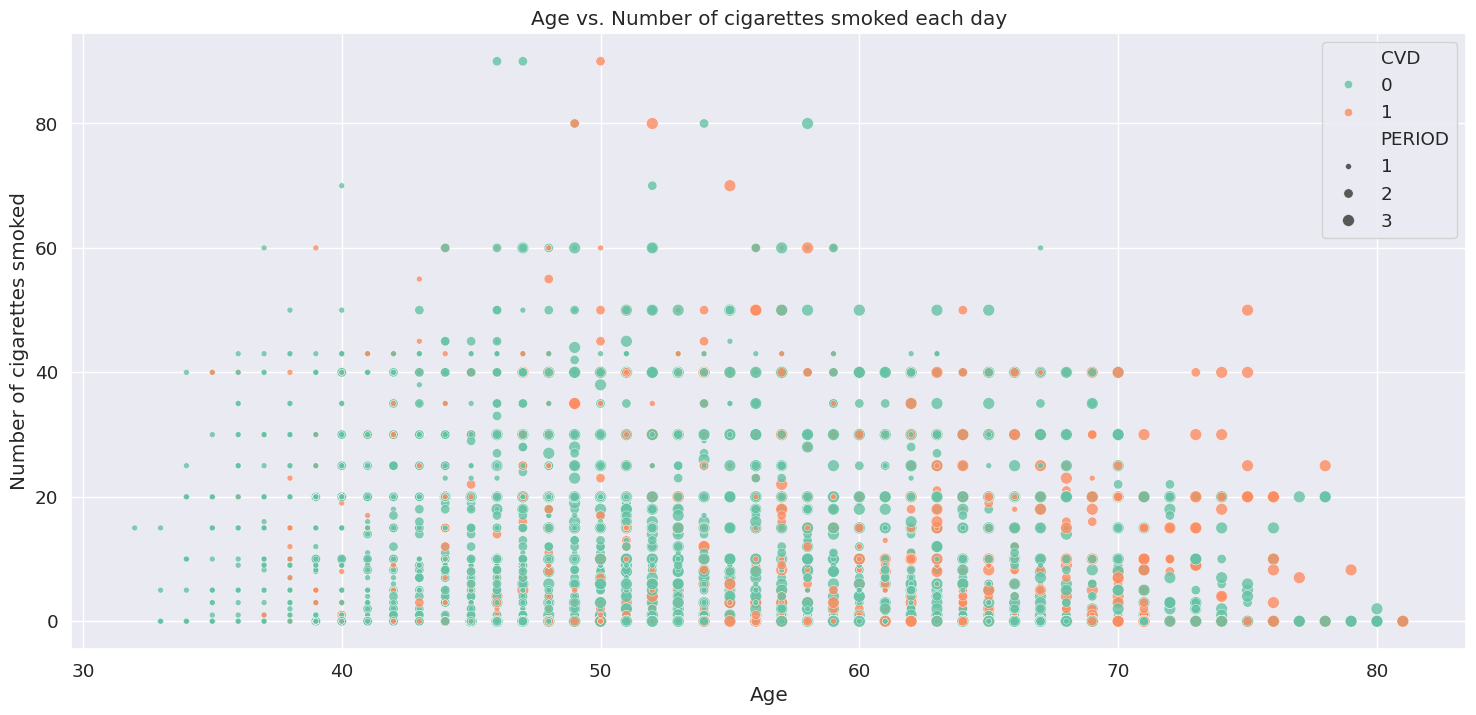

In [31]:
plt.figure(figsize=(18, 8))
sns.set_theme(style='darkgrid', palette='Set2', font_scale=1.2)
sns.scatterplot(x='AGE', y='CIGPDAY', data=framingham, hue='CVD', alpha=0.8, size='PERIOD')
plt.title('Age vs. Number of cigarettes smoked each day')
plt.xlabel('Age')
plt.ylabel('Number of cigarettes smoked')
plt.show()

### Analysis:
- Smoking as a Risk Factor:

  - Higher numbers of cigarettes smoked per day are associated with a higher likelihood of having CVD. This is consistent with medical knowledge, as smoking is a well-known risk factor for cardiovascular disease.
  - The plot shows that individuals with CVD tend to have higher smoking levels, which can contribute to the development and progression of cardiovascular disease.
-Age Distribution:

  - Across different ages, individuals are present at various smoking levels. However, there is no clear trend showing that older or younger individuals smoke more or less; smoking habits appear to be distributed across all ages.

### Conclusion
The plot provides a visual representation of how age and the number of cigarettes smoked each day relate to the presence of cardiovascular disease. Higher smoking levels are more frequently associated with CVD, emphasizing the importance of smoking cessation in preventing and managing cardiovascular disease. The data also show consistent recording of smoking habits across different periods of observation.

## Age vs. Low Density Lipoprotein Cholesterol (mg/dL)

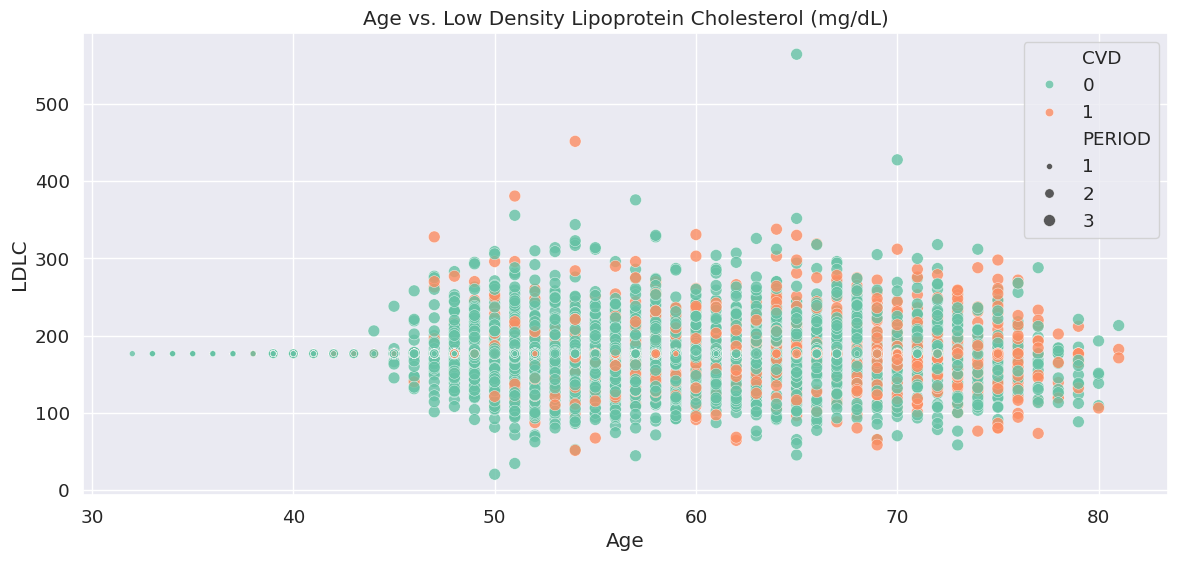

In [32]:
plt.figure(figsize=(14, 6))
sns.set_theme(style='darkgrid', palette='Set2', font_scale=1.2)
sns.scatterplot(x='AGE', y='LDLC', data=framingham, hue='CVD', alpha=0.8, size='PERIOD')
plt.title('Age vs. Low Density Lipoprotein Cholesterol (mg/dL)')
plt.xlabel('Age')
plt.ylabel('LDLC')
plt.show()

### Analysis
- Age and LDLC Levels:

 - LDLC levels vary widely across different age groups.
 - There is a noticeable cluster of LDLC levels between 100 and 200 mg/dL, which is common across all ages.
 - Higher LDLC levels (above 200 mg/dL) are less frequent but are present across different age groups, particularly in individuals aged 50 and above.

- CVD Distribution:

 - Individuals with cardiovascular disease (CVD = 1, orange dots) are spread across all age groups.
 - Higher LDLC levels are more frequently associated with individuals with CVD.
 - Individuals without CVD (green dots) are present across all LDLC levels but seem more concentrated at lower LDLC levels.

- Period of Observation:

 - The varying sizes of the dots indicate that data has been collected over multiple periods.
 - Each cluster of LDLC levels contains data points from all three periods, suggesting that LDLC levels are consistently recorded across different observation periods.

### Key Takeaways

- LDLC Levels as a Risk Factor:

 - Higher LDLC levels are associated with a higher likelihood of having CVD. This is consistent with medical knowledge, as elevated LDLC is a significant risk factor for cardiovascular disease.
 - The plot shows that individuals with CVD tend to have higher LDLC levels, which can contribute to the development and progression of cardiovascular disease.

- Age Distribution:

 - Across different ages, individuals are present at various LDLC levels. However, there is no clear trend showing that older or younger individuals have higher or lower LDLC levels; LDLC levels appear to be distributed across all ages.

### Conclusion
The plot provides a visual representation of how age and low-density lipoprotein cholesterol (LDLC) levels are related to the presence of cardiovascular disease. Higher LDLC levels are more frequently associated with CVD, emphasizing the importance of managing cholesterol levels as part of cardiovascular disease prevention and treatment strategies. The data also show consistent recording of LDLC levels across different periods of observation.

## Age vs. High Density Lipoprotein Cholesterol (mg/dL)

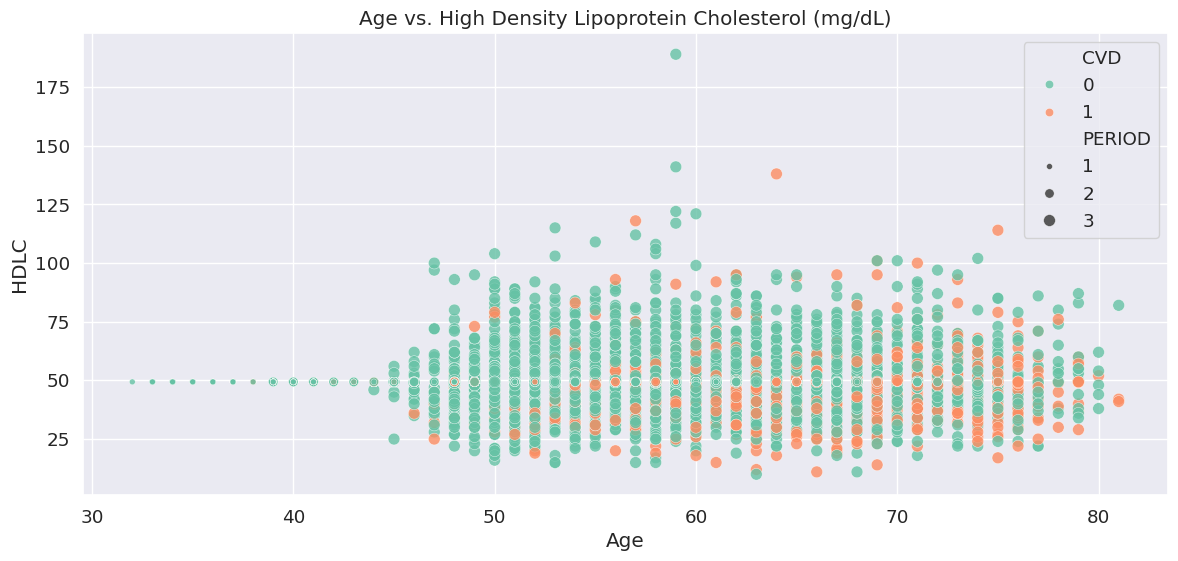

In [33]:
plt.figure(figsize=(14, 6))
sns.set_theme(style='darkgrid', palette='Set2', font_scale=1.2)
sns.scatterplot(x='AGE', y='HDLC', data=framingham, hue='CVD', alpha=0.8, size='PERIOD')
plt.title('Age vs. High Density Lipoprotein Cholesterol (mg/dL)')
plt.xlabel('Age')
plt.ylabel('HDLC')
plt.show()

### Key Takeaways
- HDLC Levels as a Risk Factor:

 - High-density lipoprotein cholesterol (HDLC) is often referred to as "good cholesterol." Higher levels of HDLC are generally associated with a lower risk of cardiovascular disease.
 - The plot does not show a clear inverse relationship between HDLC levels and CVD presence. Both individuals with and without CVD are spread across the range of HDLC levels, indicating that HDLC alone may not be a strong differentiator for CVD in this dataset.

- Age Distribution:

 - Across different ages, individuals are present at various HDLC levels. There is no clear trend showing that older or younger individuals have higher or lower HDLC levels; HDLC levels appear to be distributed across all ages.

### Conclusion
The plot provides a visual representation of how age and high-density lipoprotein cholesterol (HDLC) levels are related to the presence of cardiovascular disease. HDLC levels alone do not show a strong differentiation between individuals with and without CVD in this dataset. Both groups are spread across the entire range of HDLC levels, suggesting that other factors in combination with HDLC should be considered for assessing cardiovascular disease risk.

## Age Distribution

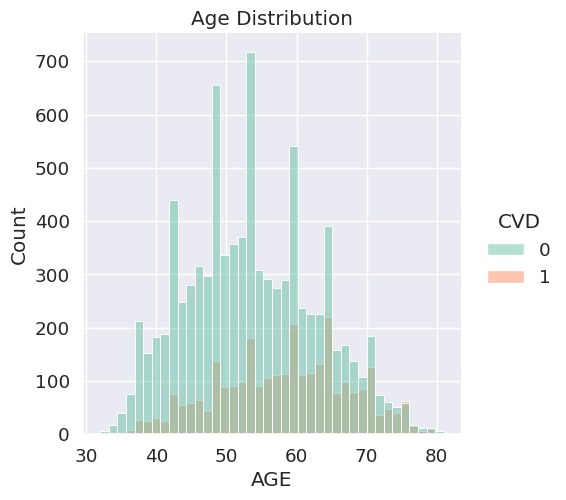

In [35]:
sns.set_theme(style='darkgrid', palette='Set2', font_scale=1.2)
sns.displot(x='AGE', data=framingham, kind='hist', hue='CVD')
plt.title('Age Distribution')
plt.show()

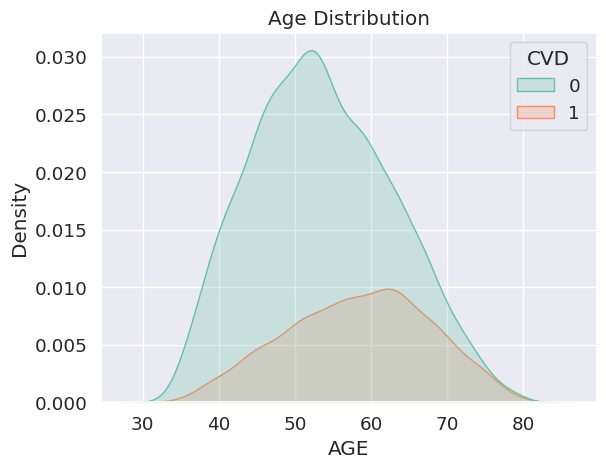

In [36]:
sns.set_theme(style='darkgrid', palette='Set2', font_scale=1.2)
sns.kdeplot(x='AGE', data=framingham, fill=True, hue='CVD')
plt.title('Age Distribution')
plt.show()

## Distribution of 'AGE','SEX', 'CURSMOKE', 'CIGPDAY', 'SYSBP','DIABP'

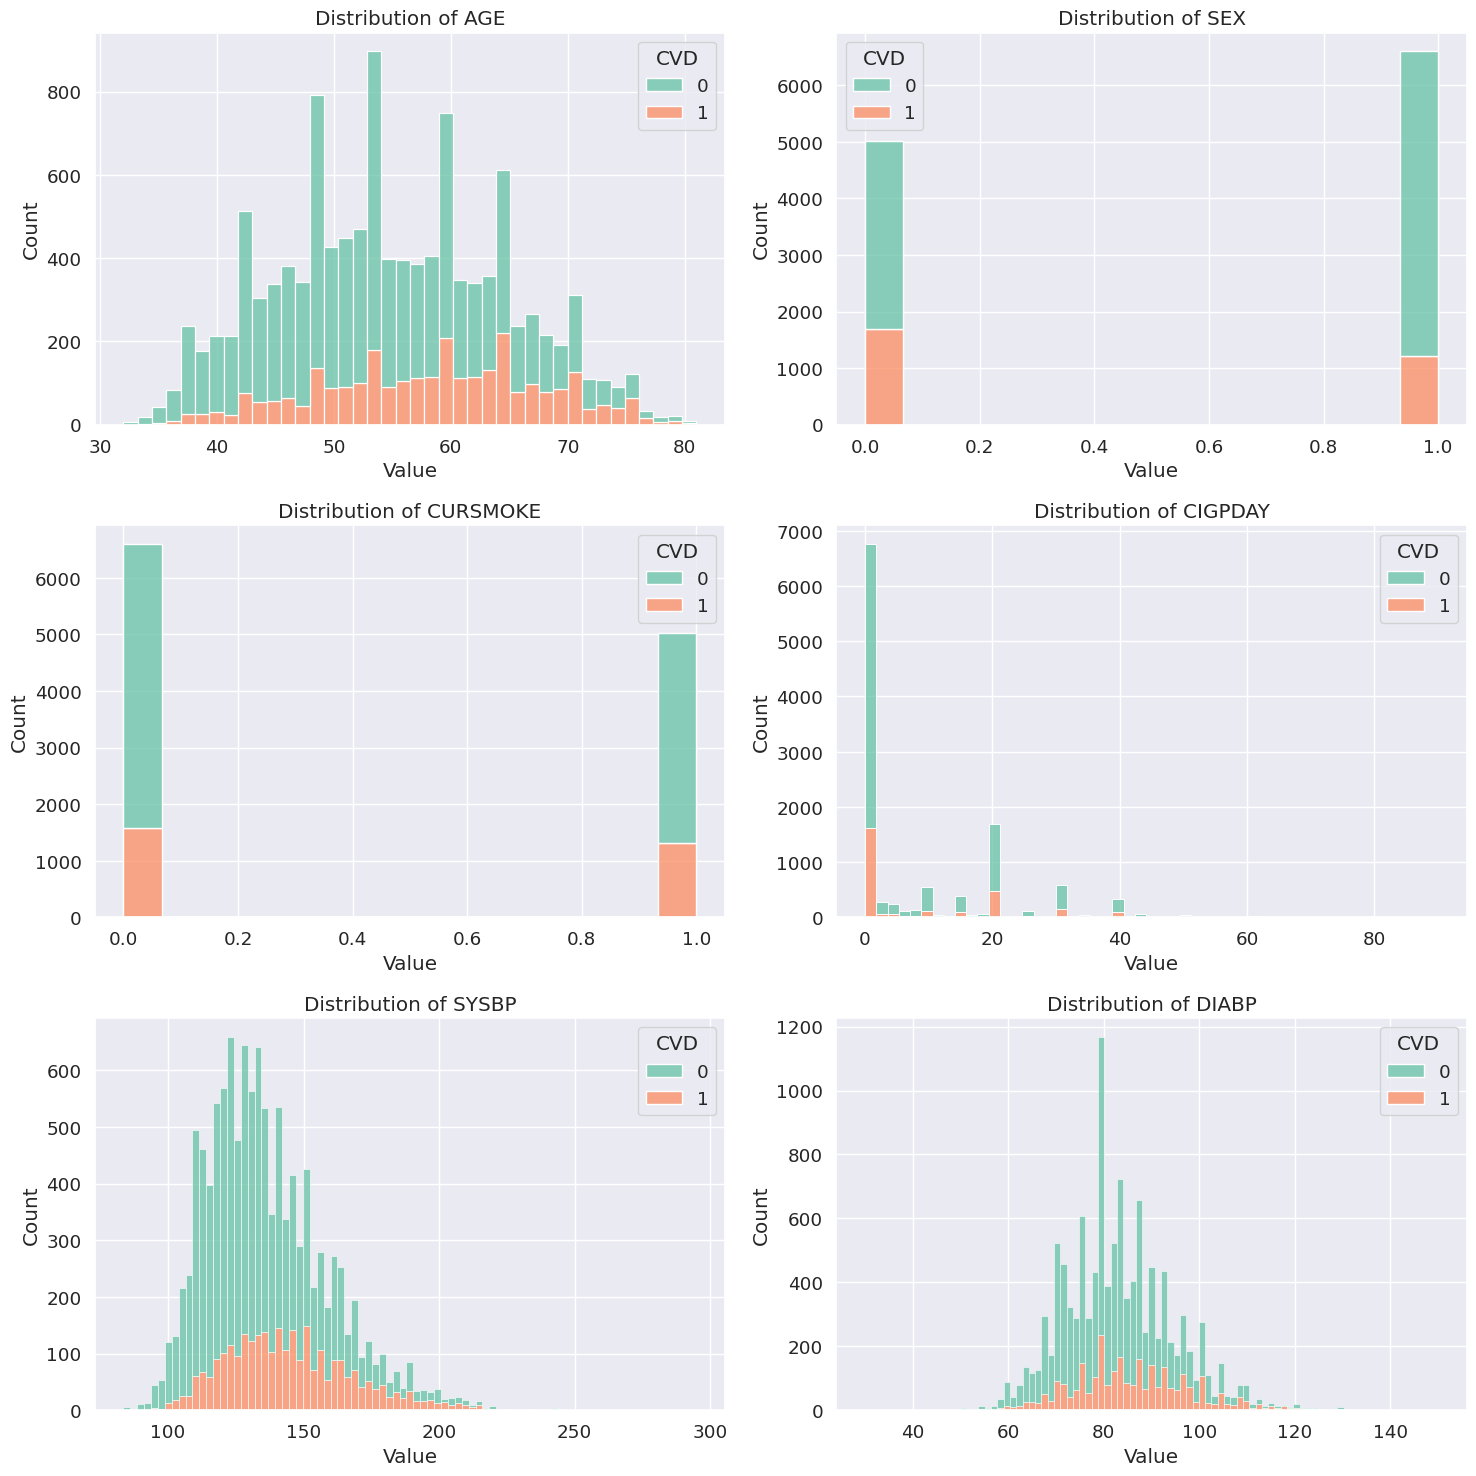

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to plot
features = ['AGE','SEX', 'CURSMOKE', 'CIGPDAY', 'SYSBP','DIABP']

# Create a 3x2 subplot grid
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot each feature
for ax, feature in zip(axes.flatten(), features):
    sns.set_theme(style='darkgrid', palette='Set2', font_scale=1.2)
    sns.histplot(data=framingham, x=feature, hue='CVD', multiple='stack', ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

### 1. Distribution of AGE
- The age distribution for individuals without CVD (green) peaks around 50-55 years.
- Individuals with CVD (orange) are more evenly distributed across ages but are more prevalent in older age groups, indicating age is a risk factor for CVD.

### 2. Distribution of SEX
- There are more females (0) than males (1) in the dataset.
- The distribution shows that males have a slightly higher prevalence of CVD compared to females, although both sexes have a substantial number of CVD cases.

### 3. Distribution of CURSMOKE (Current Smoking Status)
- A significant number of individuals are non-smokers (0).
- Among current smokers (1), a significant portion also has CVD (orange), suggesting that smoking is a strong risk factor for CVD.

### 4. Distribution of CIGPDAY (Number of Cigarettes Smoked per Day)
- The majority of individuals either do not smoke or smoke fewer than 10 cigarettes per day.
- Among those who smoke more, the prevalence of CVD (orange) increases, indicating that higher cigarette consumption is associated with a higher risk of CVD.

### 5. Distribution of SYSBP (Systolic Blood Pressure)
- The distribution for individuals without CVD (green) is centered around 120-140 mmHg.
- Individuals with CVD (orange) have a higher distribution, centered around 140-160 mmHg, indicating higher systolic blood pressure is associated with CVD.

### 6. Distribution of DIABP (Diastolic Blood Pressure)
- The distribution for individuals without CVD (green) is centered around 70-90 mmHg.
- Individuals with CVD (orange) have a higher distribution within the same range, indicating that higher diastolic blood pressure is associated with CVD.

### Summary
- Age: Older age is associated with a higher prevalence of CVD.
- Sex: Males have a slightly higher prevalence of CVD compared to females.
- Current Smoking Status (CURSMOKE): Current smoking is strongly associated with a higher prevalence of CVD.
- Number of Cigarettes Smoked per Day (CIGPDAY): Higher cigarette consumption is associated with a higher prevalence of CVD.
- Systolic Blood Pressure (SYSBP): Higher systolic blood pressure is associated with a higher prevalence of CVD.
- Diastolic Blood Pressure (DIABP): Higher diastolic blood pressure is associated with a higher prevalence of CVD.

These histograms visually confirm known risk factors for cardiovascular disease. The separation in distributions between individuals with and without CVD for these features highlights their importance in predicting cardiovascular disease.

## Distribution of 'TOTCHOL','HDLC', 'LDLC', 'BMI', 'GLUCOSE', 'DIABETES'

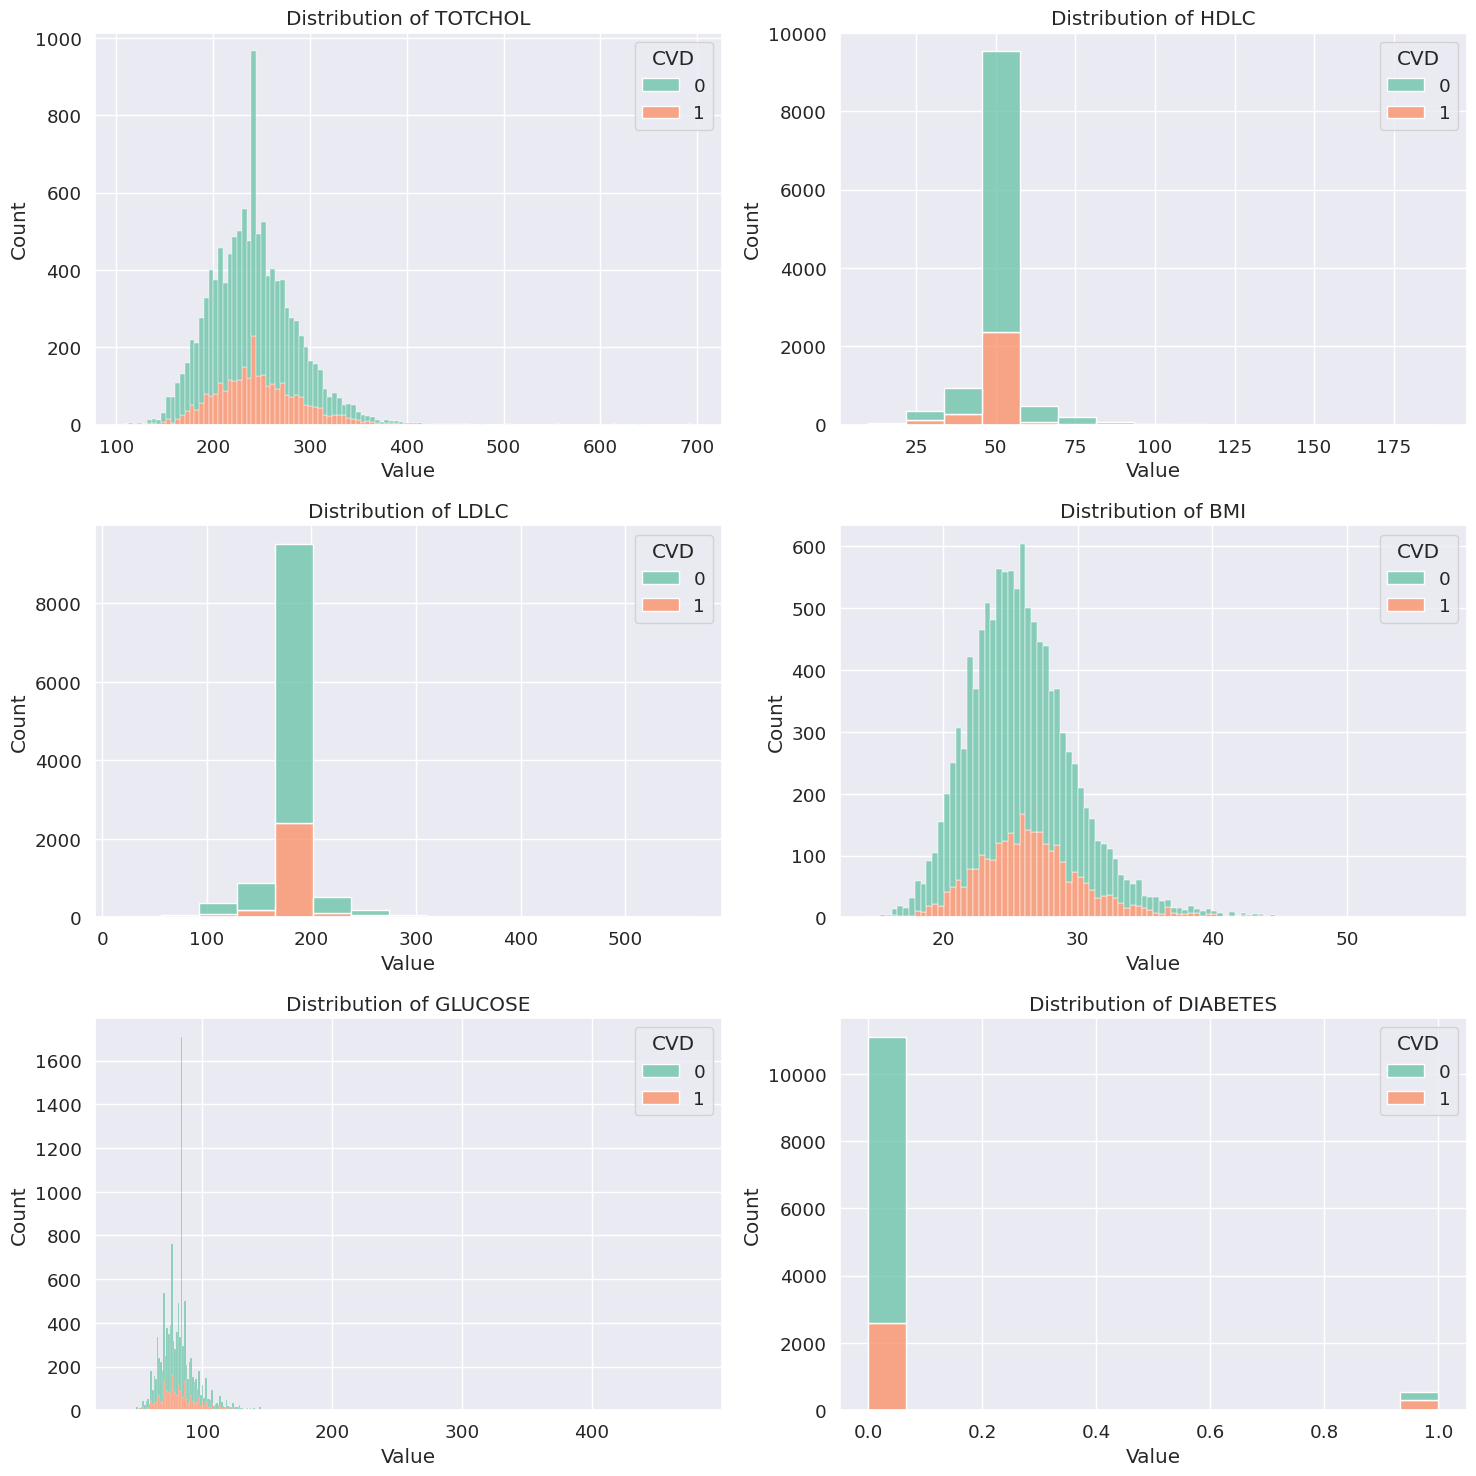

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to plot
features = ['TOTCHOL','HDLC', 'LDLC', 'BMI', 'GLUCOSE', 'DIABETES']

# Create a 3x2 subplot grid
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot each feature
for ax, feature in zip(axes.flatten(), features):
    sns.set_theme(style='darkgrid', palette='Set2', font_scale=1.2)
    sns.histplot(data=framingham, x=feature, hue='CVD', multiple='stack', ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

## Distribution of 'HOSPMI','MI_FCHD', 'ANYCHD', 'STROKE', 'HYPERTEN', 'TIMEAP'

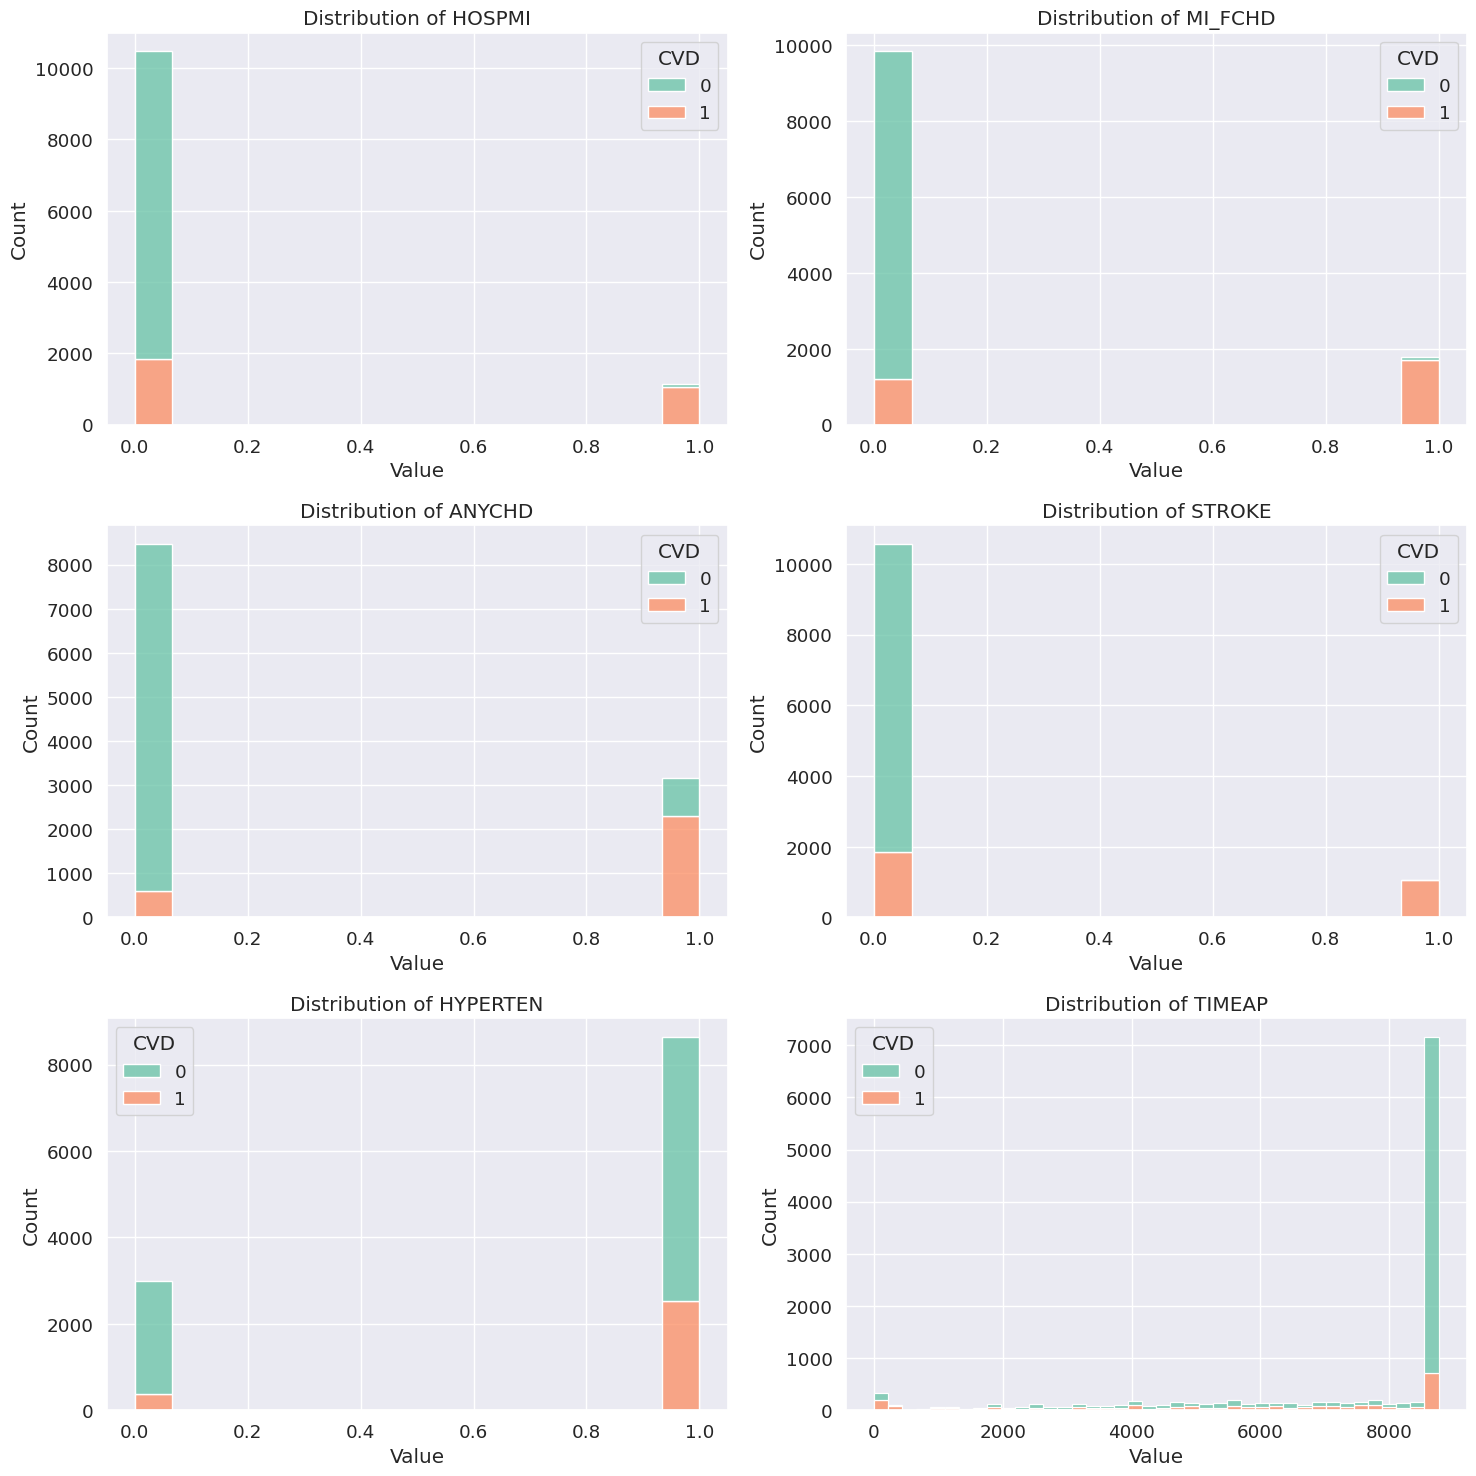

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to plot
features = ['HOSPMI','MI_FCHD', 'ANYCHD', 'STROKE', 'HYPERTEN', 'TIMEAP']

# Create a 3x2 subplot grid
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot each feature
for ax, feature in zip(axes.flatten(), features):
    sns.set_theme(style='darkgrid', palette='Set2', font_scale=1.2)
    sns.histplot(data=framingham, x=feature, hue='CVD', multiple='stack', ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

## Distribution of 'TIMEMIFC','TIMECHD', 'TIMESTRK', 'TIMECVD', 'TIMEHYP', 'TIMEDTH'

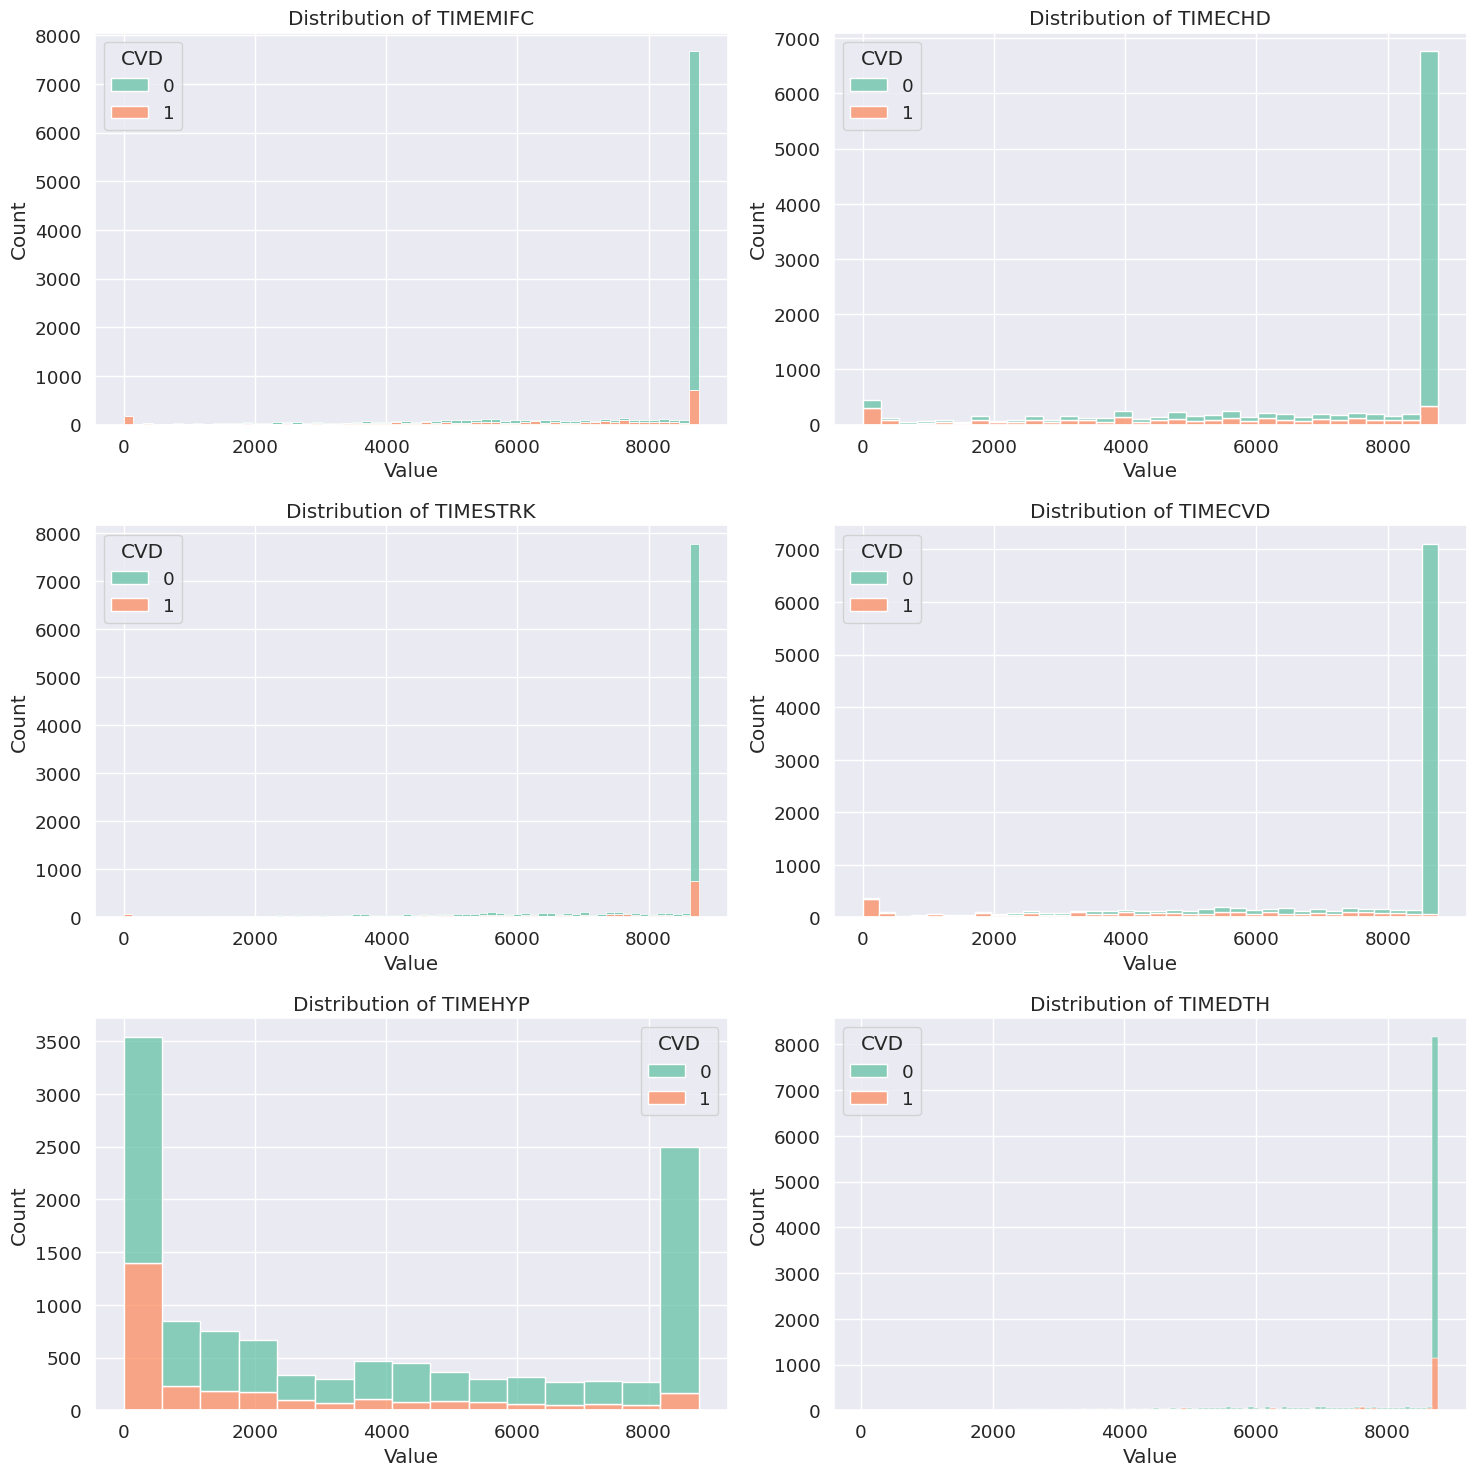

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to plot
features = ['TIMEMIFC','TIMECHD', 'TIMESTRK', 'TIMECVD', 'TIMEHYP', 'TIMEDTH']

# Create a 3x2 subplot grid
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot each feature
for ax, feature in zip(axes.flatten(), features):
    sns.set_theme(style='darkgrid', palette='Set2', font_scale=1.2)
    sns.histplot(data=framingham, x=feature, hue='CVD', multiple='stack', ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [1]:
period_1_df = framingham[framingham['PERIOD'] == 1]
period_2_df = framingham[framingham['PERIOD'] == 2]
period_3_df = framingham[framingham['PERIOD'] == 3]

NameError: name 'framingham' is not defined

## Let's try ML models

### 1 - Data Preprocessing

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/frmgham2.csv')

# Handle missing values by filling with median
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Encode categorical variables if necessary (e.g., SEX if not already binary)
# Assuming SEX is binary encoded as 0 and 1

# Split data into features and target
X = df_imputed.drop(columns=['CVD', 'RANDID'])  # Drop 'CVD' (target) and any non-feature column
y = df_imputed['CVD']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale/normalize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 2. Model Training and Evaluation
Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))
print("ROC AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1]))


Logistic Regression
[[1745    3]
 [   3  575]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1748
         1.0       0.99      0.99      0.99       578

    accuracy                           1.00      2326
   macro avg       1.00      1.00      1.00      2326
weighted avg       1.00      1.00      1.00      2326

ROC AUC: 0.9999851535714568


In [78]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_decision_tree = decision_tree.predict(X_test_scaled)
print("Decision Tree")
print(confusion_matrix(y_test, y_pred_decision_tree))
print(classification_report(y_test, y_pred_decision_tree))
print("ROC AUC:", roc_auc_score(y_test, decision_tree.predict_proba(X_test_scaled)[:, 1]))


Decision Tree
[[1747    1]
 [   0  578]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1748
         1.0       1.00      1.00      1.00       578

    accuracy                           1.00      2326
   macro avg       1.00      1.00      1.00      2326
weighted avg       1.00      1.00      1.00      2326

ROC AUC: 0.9997139588100686


In [79]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_random_forest = random_forest.predict(X_test_scaled)
print("Random Forest")
print(confusion_matrix(y_test, y_pred_random_forest))
print(classification_report(y_test, y_pred_random_forest))
print("ROC AUC:", roc_auc_score(y_test, random_forest.predict_proba(X_test_scaled)[:, 1]))


Random Forest
[[1747    1]
 [   0  578]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1748
         1.0       1.00      1.00      1.00       578

    accuracy                           1.00      2326
   macro avg       1.00      1.00      1.00      2326
weighted avg       1.00      1.00      1.00      2326

ROC AUC: 0.9999990102380971


In [80]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_gbm = gbm.predict(X_test_scaled)
print("Gradient Boosting Machine")
print(confusion_matrix(y_test, y_pred_gbm))
print(classification_report(y_test, y_pred_gbm))
print("ROC AUC:", roc_auc_score(y_test, gbm.predict_proba(X_test_scaled)[:, 1]))


Gradient Boosting Machine
[[1748    0]
 [   0  578]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1748
         1.0       1.00      1.00      1.00       578

    accuracy                           1.00      2326
   macro avg       1.00      1.00      1.00      2326
weighted avg       1.00      1.00      1.00      2326

ROC AUC: 1.0


In [81]:
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test_scaled)
print("XGBoost")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1]))


XGBoost
[[1748    0]
 [   0  578]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1748
         1.0       1.00      1.00      1.00       578

    accuracy                           1.00      2326
   macro avg       1.00      1.00      1.00      2326
weighted avg       1.00      1.00      1.00      2326

ROC AUC: 1.0


In [83]:
df['CVD'].value_counts()

CVD
0    8728
1    2899
Name: count, dtype: int64

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model with cross-validation
log_reg = LogisticRegression(max_iter=1000)
scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

# Fit the model on the training set
log_reg.fit(X_train, y_train)

# Predict and evaluate on the test set
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))
print("ROC AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores: [0.96614723 0.98655914 0.97526882 0.99032258 0.97150538]
Mean cross-validation score: 0.9779606293298203
Logistic Regression
[[1744    4]
 [  53  525]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1748
         1.0       0.99      0.91      0.95       578

    accuracy                           0.98      2326
   macro avg       0.98      0.95      0.97      2326
weighted avg       0.98      0.98      0.98      2326

ROC AUC: 0.9925164102523496


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train Decision Tree model with cross-validation
decision_tree = DecisionTreeClassifier(random_state=42)
scores_dt = cross_val_score(decision_tree, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Decision Tree Cross-validation scores:", scores_dt)
print("Mean cross-validation score:", scores_dt.mean())

# Fit the model on the training set
decision_tree.fit(X_train_scaled, y_train)

# Predict and evaluate on the test set
y_pred_decision_tree = decision_tree.predict(X_test_scaled)
print("Decision Tree")
print(confusion_matrix(y_test, y_pred_decision_tree))
print(classification_report(y_test, y_pred_decision_tree))
print("ROC AUC:", roc_auc_score(y_test, decision_tree.predict_proba(X_test_scaled)[:, 1]))


Decision Tree Cross-validation scores: [0.99677593 0.99516129 0.99731183 0.99946237 0.99462366]
Mean cross-validation score: 0.9966670133411913
Decision Tree
[[1747    1]
 [   0  578]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1748
         1.0       1.00      1.00      1.00       578

    accuracy                           1.00      2326
   macro avg       1.00      1.00      1.00      2326
weighted avg       1.00      1.00      1.00      2326

ROC AUC: 0.9997139588100686


In [86]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model with cross-validation
random_forest = RandomForestClassifier(random_state=42)
scores_rf = cross_val_score(random_forest, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Random Forest Cross-validation scores:", scores_rf)
print("Mean cross-validation score:", scores_rf.mean())

# Fit the model on the training set
random_forest.fit(X_train_scaled, y_train)

# Predict and evaluate on the test set
y_pred_random_forest = random_forest.predict(X_test_scaled)
print("Random Forest")
print(confusion_matrix(y_test, y_pred_random_forest))
print(classification_report(y_test, y_pred_random_forest))
print("ROC AUC:", roc_auc_score(y_test, random_forest.predict_proba(X_test_scaled)[:, 1]))


Random Forest Cross-validation scores: [0.99785062 0.99677419 0.99946237 0.9983871  0.99677419]
Mean cross-validation score: 0.9978496934819411
Random Forest
[[1747    1]
 [   0  578]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1748
         1.0       1.00      1.00      1.00       578

    accuracy                           1.00      2326
   macro avg       1.00      1.00      1.00      2326
weighted avg       1.00      1.00      1.00      2326

ROC AUC: 0.9999990102380971


In [87]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model with cross-validation
gbm = GradientBoostingClassifier(random_state=42)
scores_gbm = cross_val_score(gbm, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Gradient Boosting Cross-validation scores:", scores_gbm)
print("Mean cross-validation score:", scores_gbm.mean())

# Fit the model on the training set
gbm.fit(X_train_scaled, y_train)

# Predict and evaluate on the test set
y_pred_gbm = gbm.predict(X_test_scaled)
print("Gradient Boosting Machine")
print(confusion_matrix(y_test, y_pred_gbm))
print(classification_report(y_test, y_pred_gbm))
print("ROC AUC:", roc_auc_score(y_test, gbm.predict_proba(X_test_scaled)[:, 1]))


Gradient Boosting Cross-validation scores: [0.99785062 0.99892473 0.99946237 1.         0.99784946]
Mean cross-validation score: 0.998817435417425
Gradient Boosting Machine
[[1748    0]
 [   0  578]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1748
         1.0       1.00      1.00      1.00       578

    accuracy                           1.00      2326
   macro avg       1.00      1.00      1.00      2326
weighted avg       1.00      1.00      1.00      2326

ROC AUC: 1.0


In [88]:
import xgboost as xgb

# Train XGBoost model with cross-validation
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
scores_xgb = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("XGBoost Cross-validation scores:", scores_xgb)
print("Mean cross-validation score:", scores_xgb.mean())

# Fit the model on the training set
xgb_model.fit(X_train_scaled, y_train)

# Predict and evaluate on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)
print("XGBoost")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1]))


XGBoost Cross-validation scores: [0.99892531 0.99946237 0.99946237 1.         0.9983871 ]
Mean cross-validation score: 0.9992474273861319
XGBoost
[[1748    0]
 [   0  578]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1748
         1.0       1.00      1.00      1.00       578

    accuracy                           1.00      2326
   macro avg       1.00      1.00      1.00      2326
weighted avg       1.00      1.00      1.00      2326

ROC AUC: 1.0


Correlation with CVD in the full dataset:
CVD         1.000000
MI_FCHD     0.692833
ANYCHD      0.673832
STROKE      0.549839
HOSPMI      0.519456
DEATH       0.395524
ANGINA      0.333093
PREVMI      0.301679
PREVCHD     0.288455
SYSBP       0.228500
AGE         0.210166
PREVHYP     0.206857
PREVAP      0.202142
PREVSTRK    0.199700
HYPERTEN    0.165775
DIABP       0.158936
DIABETES    0.156171
BPMEDS      0.110576
BMI         0.108262
GLUCOSE     0.106510
TOTCHOL     0.075448
CIGPDAY     0.031973
LDLC        0.024620
CURSMOKE    0.022913
HEARTRTE    0.013031
RANDID      0.012640
PERIOD     -0.024631
TIME       -0.024752
educ       -0.070432
HDLC       -0.074061
SEX        -0.175324
TIMEHYP    -0.259852
TIMEDTH    -0.273489
TIMEAP     -0.367322
TIMESTRK   -0.393615
TIMEMI     -0.405920
TIMEMIFC   -0.435883
TIMECHD    -0.478305
TIMECVD    -0.649246
Name: CVD, dtype: float64


<ipython-input-72-995ccc8ceae8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=significant_correlations.values, y=significant_correlations.index, palette='coolwarm')


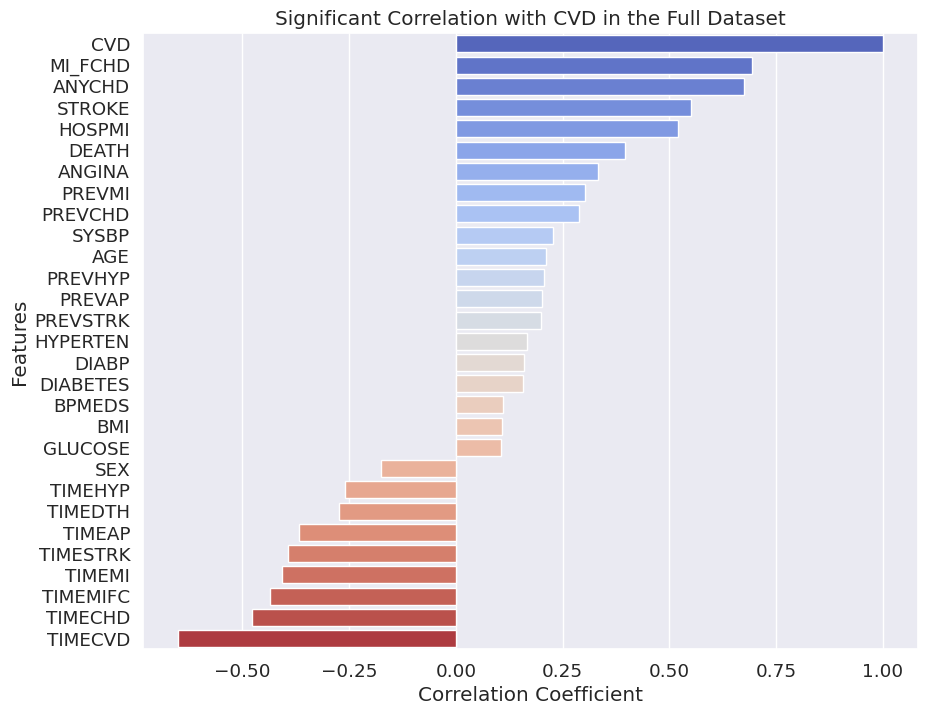

In [72]:
# Calculate the correlation matrix for the entire dataset
correlation_matrix = framingham.corr()

# Get the correlation with the 'CVD' attribute and sort by descending order
correlation_with_cvd = correlation_matrix['CVD'].sort_values(ascending=False)

# Print correlations to check values
print("Correlation with CVD in the full dataset:")
print(correlation_with_cvd)

# Filter out near-zero correlations
significant_correlations = correlation_with_cvd[abs(correlation_with_cvd) > 0.1]  # Adjust threshold as needed

# Plot the significant correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=significant_correlations.values, y=significant_correlations.index, palette='coolwarm')
plt.title('Significant Correlation with CVD in the Full Dataset')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [ ]:
import pandas as pd
from lifelines import Kaplan-MeierFitter, CoxPHFitter

# Load your dataset
framingham = pd.read_csv('/content/drive/MyDrive/data/frmgham2.csv')

# Kaplan-Meier Estimator
kmf = Kaplan-MeierFitter()
kmf.fit(durations=data['time_to_event'], event_observed=data['event'])
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.show()

# Cox Proportional Hazards Model
cph = CoxPHFitter()
cph.fit(data, duration_col='time_to_event', event_col='event')
cph.print_summary()  # Print summary of the model
cph.plot()
plt.title('Cox Proportional Hazards Model')
plt.show()
